In [1]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz-10.0.1-win64/bin/'

import sys
sys.path.append('../algorithms/')

from CSOWP_SR import *
from ExpressionTree import *
import utils

import pandas as pd
import numpy as np
import pickle
import re
import sympy as smp
# import edist.ted as ted

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import itertools

# Concatenating Data 

In [2]:
funcs_dict = {
    "F1_specific": "lambda x: 1.57 + 24.3*x", "F4_specific": "lambda x: -2.3 + 0.13*np.sin(x)", 
    "F5_specific": "lambda x: 3 + 2.13*np.log(x)", "F6_specific": "lambda x: 1.3 + 0.13*np.sqrt(x)",
    "F7_specific": "lambda x: 213.809408*(1-np.exp(-0.547237*x))", 
    "F11_specific": "lambda x: 6.87 + 11*np.cos(7.23*x**3)",
    "F1": "lambda x: 1.57 + 24.3*x", "F4": "lambda x: -2.3 + 0.13*np.sin(x)", 
    "F5": "lambda x: 3 + 2.13*np.log(x)", "F6": "lambda x: 1.3 + 0.13*np.sqrt(x)",
    "F7": "lambda x: 213.809408*(1-np.exp(-0.547237*x))", 
    "F11": "lambda x: 6.87 + 11*np.cos(7.23*x**3)",
    "logistic_specific": "lambda x: 10*np.exp(-0.5*np.exp(-0.5*x + 2))",
    "logistic": "lambda x: 10*np.exp(-0.5*np.exp(-0.5*x + 2))",
    "logistic_noTanh": "lambda x: 10*np.exp(-0.5*np.exp(-0.5*x + 2))",
    "projectile_motion_specific": "lambda x: 6*x -9.8*x**2",
    "projectile_motion": "lambda x: 6*x -9.8*x**2",
    "damped_pendulum_specific": "lambda x: np.exp(-x/10)*(3*np.cos(2*x))",
    "damped_pendulum": "lambda x: np.exp(-x/10)*(3*np.cos(2*x))",
    "radioactive_decay_specific": "lambda x: 10*np.exp(-0.5*x)", 
    "radioactive_decay": "lambda x: 10*np.exp(-0.5*x)"
    }

expected_data = pd.DataFrame(columns=["nodes", "adj", "problem", "expected_string"])
expected_data

symbols = {"x": smp.symbols("x", positive=True, real=True)}

for name, function in funcs_dict.items():
    function = function[10:]
    function = smp.parse_expr(function.replace("np.", ""), local_dict=symbols).simplify()
    tree = utils.exprToTree(function, single_name=True)
    node, adj = tree.parentChildRepr().values()
    df = pd.DataFrame([{"nodes": node, "adj": adj, "problem": name, "expected_string": function,
                          "expected_tree": tree}])
    expected_data = pd.concat([expected_data, df])

expected_data.set_index("problem", drop=True, inplace=True)
expected_data

nodes  \
problem                                                             
F1_specific                                       [+, C, *, C, x]   
F4_specific                                  [+, C, *, C, sin, x]   
F5_specific                                  [+, C, *, C, log, x]   
F6_specific                                [+, C, *, C, **, x, C]   
F7_specific                            [+, C, *, C, exp, *, C, x]   
F11_specific                    [+, C, *, C, cos, *, C, **, x, C]   
F1                                                [+, C, *, C, x]   
F4                                           [+, C, *, C, sin, x]   
F5                                           [+, C, *, C, log, x]   
F6                                         [+, C, *, C, **, x, C]   
F7                                     [+, C, *, C, exp, *, C, x]   
F11                             [+, C, *, C, cos, *, C, **, x, C]   
logistic_specific           [*, C, exp, *, C, exp, +, C, *, C, x]   
logistic                    [*, C, exp, *, C, exp, +, C, *, C, x]   
logistic_noTanh             [*, C, exp, *, C, exp, +, C, *, C, x]   
projectile_motion_specific                  [*, x, +, C, *, C, x]   
projectile_motion                           [*, x, +, C, *, C, x]   
damped_pendulum_specific    [*, C, *, cos, *, C, x, exp, *, C, x]   
damped_pendulum             [*, C, *, cos, *, C, x, exp, *, C, x]   
radioactive_decay_specific                   [*, C, exp, *, C, x]   
radioactive_decay                            [*, C, exp, *, C, x]   

                                                                          adj  \
problem                                                                         
F1_specific                                      [[1, 2], [], [3, 4], [], []]   
F4_specific                                 [[1, 2], [], [3, 4], [], [5], []]   
F5_specific                                 [[1, 2], [], [3, 4], [], [5], []]   
F6_specific                          [[1, 2], [], [3, 4], [], [5, 6], [], []]   
F7_specific                     [[1, 2], [], [3, 4], [], [5], [6, 7], [], []]   
F11_specific                [[1, 2], [], [3, 4], [], [5], [6, 7], [], [8, ...   
F1                                               [[1, 2], [], [3, 4], [], []]   
F4                                          [[1, 2], [], [3, 4], [], [5], []]   
F5                                          [[1, 2], [], [3, 4], [], [5], []]   
F6                                   [[1, 2], [], [3, 4], [], [5, 6], [], []]   
F7                              [[1, 2], [], [3, 4], [], [5], [6, 7], [], []]   
F11                         [[1, 2], [], [3, 4], [], [5], [6, 7], [], [8, ...   
logistic_specific           [[1, 2], [], [3], [4, 5], [], [6], [7, 8], [],...   
logistic                    [[1, 2], [], [3], [4, 5], [], [6], [7, 8], [],...   
logistic_noTanh             [[1, 2], [], [3], [4, 5], [], [6], [7, 8], [],...   
projectile_motion_specific           [[1, 2], [], [3, 4], [], [5, 6], [], []]   
projectile_motion                    [[1, 2], [], [3, 4], [], [5, 6], [], []]   
damped_pendulum_specific    [[1, 2], [], [3, 7], [4], [5, 6], [], [], [8],...   
damped_pendulum             [[1, 2], [], [3, 7], [4], [5, 6], [], [], [8],...   
radioactive_decay_specific                  [[1, 2], [], [3], [4, 5], [], []]   
radioactive_decay                           [[1, 2], [], [3], [4, 5], [], []]   

                                                     expected_string  \
problem                                                                
F1_specific                                            24.3*x + 1.57   
F4_specific                                        0.13*sin(x) - 2.3   
F5_specific                                          2.13*log(x) + 3   
F6_specific                                       0.13*sqrt(x) + 1.3   
F7_specific                 213.809408 - 213.809408*exp(-0.547237*x)   
F11_specific                              11.0*cos(7.23*x**3) + 6.87   
F1                              

In [3]:
# with open("article_data.pickle", "wb") as file:
#     pickle.dump(data, file)

# with open("expected_data.pickle", "wb") as file:
#     pickle.dump(expected_data, file)

In [10]:
with open("Cluster_outputs/ted_data.pickle", "rb") as file:
    ted_data = pickle.load(file).reset_index(drop=True)

# with open("ted_data_original.pickle", "rb") as file:
#     ted_data_original = pickle.load(file)

In [11]:
def print_full(df, lines=100):
    pd.set_option('display.max_rows', lines)
    display(df.head(lines))
    pd.reset_option('display.max_rows')

In [ ]:
print_full(ted_data[ted_data["problem"] == "F7"])

In [13]:
expected = {}

for index, row in ted_data.iterrows():
    problem = row.problem
    expected[index] = expected_data.loc[problem].nodes

expected_dict = {"expected_nodes": expected}

expected_df = pd.DataFrame(expected_dict, index=expected.keys())
ted_data = pd.concat([ted_data, expected_df], axis=1)

# Data Analysis

In [29]:
ted_data["problem"].value_counts()

problem
F6_specific                   1198
F1_specific                   1095
F7_specific                    830
F4_specific                    767
F11_specific                   762
F4                             597
F1                             590
F5_specific                    448
F11                            362
logistic_specific              360
projectile_motion_specific     360
logistic_noTanh                360
logistic                       360
damped_pendulum_specific       360
damped_pendulum                360
radioactive_decay              360
projectile_motion              360
radioactive_decay_specific     359
F5                             352
F6                             159
F7                              30
Name: count, dtype: int64

In [92]:
def problem_info(data, metric="MSE"):
    problems = data["problem"].unique()

    dfs = []

    for problem in problems:
        info_dict = {}

        filt_data = data[data["problem"] == problem][metric]
        info_dict["problem"] = problem
        info_dict["metric"] = metric
        info_dict["var"] = filt_data.var()
        info_dict["std"] = filt_data.std()
        info_dict["mean"] = filt_data.mean()

        df = pd.DataFrame([info_dict])
        dfs.append(df)
    return pd.concat(dfs).reset_index(drop=True)

def method_info(data, metric="MSE"):
    opts = data["optimization"].unique()

    dfs = []

    for opt in opts:
        info_dict = {}

        filt_data = data[data["optimization"] == opt][metric]
        info_dict["optimization"] = opt
        info_dict["metric"] = metric
        info_dict["var"] = filt_data.var()
        info_dict["std"] = filt_data.std()
        info_dict["mean"] = filt_data.mean()

        df = pd.DataFrame([info_dict])
        dfs.append(df)
    return pd.concat(dfs).reset_index(drop=True)

def all_info(data, metric="MSE"):
    problems = data["problem"].unique()
    opts = data["optimization"].unique()

    final_dfs=[]

    for problem in problems:
        problem_data = data[data["problem"] == problem]

        dfs = []

        for opt in opts:
            info_dict = {}

            filt_data = problem_data[problem_data["optimization"] == opt][metric]
            info_dict["optimization"] = opt
            info_dict["metric"] = metric
            info_dict["var"] = filt_data.var()
            info_dict["std"] = filt_data.std()
            info_dict["mean"] = filt_data.mean()

            df = pd.DataFrame([info_dict])
            dfs.append(df)

        problem_df = pd.concat(dfs)
        problem_df["problem"] = problem
        final_dfs.append(problem_df)
    
    return pd.concat(final_dfs).sort_values("optimization").reset_index(drop=True)
    

In [150]:
opts_data["BFGS"]

problem
F1_specific                   70
F6_specific                   70
F5_specific                   47
F7_specific                   46
F4_specific                   42
F11_specific                  42
F4                            26
F1                            25
logistic_specific              0
F11                            0
projectile_motion_specific     0
logistic_noTanh                0
logistic                       0
damped_pendulum_specific       0
damped_pendulum                0
radioactive_decay_specific     0
projectile_motion              0
radioactive_decay              0
F5                            -7
F6                           -22
F7                           -27
Name: count, dtype: int64

In [170]:
opts = ted_data["optimization"].unique()

opts_data = {}

for opt in opts:
    data = ted_data[ted_data["optimization"] == opt]["problem"].value_counts() - 30
    opts_data[opt] = data

opts_data["BFGS"]


clean_data = []
for keys, values in opts_data.items():
    
    series = {}

    for key, value in values.items():
        if value < 0:
            series[key] = np.abs(value)
    
    series["problem"] = keys
    clean_data.append(pd.DataFrame([series]))

missing_data = pd.concat(clean_data).set_index("problem")
missing_data

F6  F5_specific    F7    F5  \
problem                                                 
BFGS_random              6.0         13.0  27.0   NaN   
BFGS                    22.0          NaN  27.0   7.0   
CG_random               24.0          NaN  13.0   NaN   
CG                       6.0         12.0  28.0   NaN   
differential_evolution   NaN          NaN   NaN  14.0   
dual_annealing          18.0          NaN   NaN  15.0   
random_LS                6.0          8.0  28.0   NaN   
LS                       9.0         15.0   NaN   NaN   
Nelder-Mead_random      29.0          NaN   NaN   9.0   
Nelder-Mead              5.0          7.0  27.0   NaN   
NoOpt                   16.0         22.0   NaN   NaN   
PSO_NEW                  NaN          NaN   NaN   NaN   

                        radioactive_decay_specific   F1   F4  
problem                                                       
BFGS_random                                    NaN  NaN  NaN  
BFGS                                           NaN  NaN  NaN  
CG_random                                      NaN  NaN  NaN  
CG                                             NaN  NaN  NaN  
differential_evolution                         NaN  NaN  NaN  
dual_annealing                                 NaN  NaN  NaN  
random_LS                                      NaN  NaN  NaN  
LS                                             1.0  NaN  NaN  
Nelder-Mead_random                             NaN  NaN  NaN  
Nelder-Mead                                    NaN  NaN  NaN  
NoOpt                                          NaN  NaN  NaN  
PSO_NEW                                        NaN  1.0  2.0

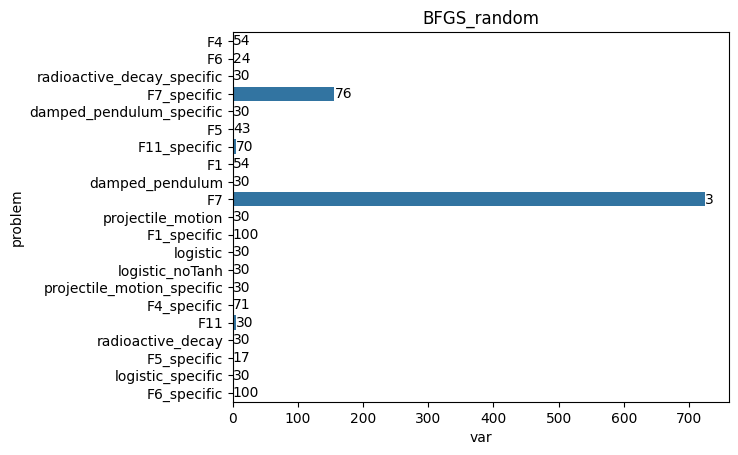

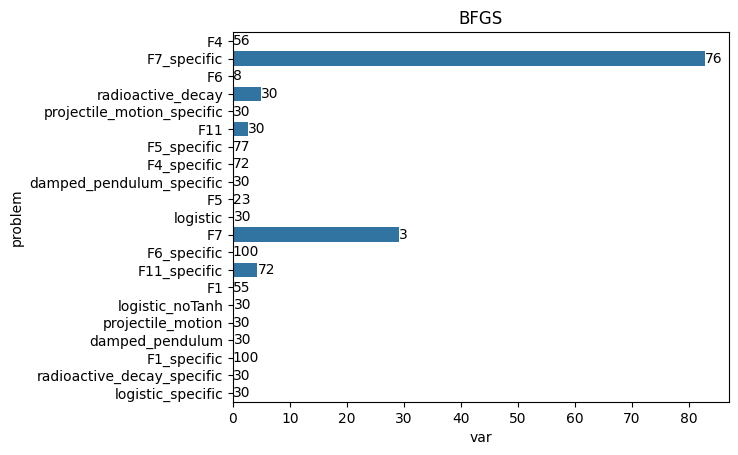

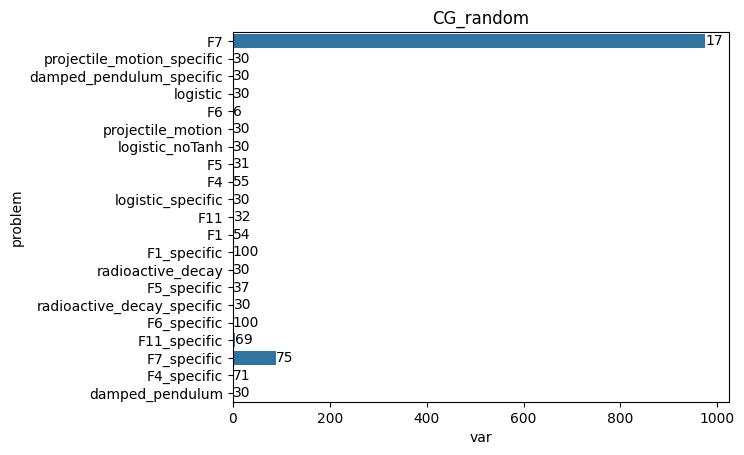

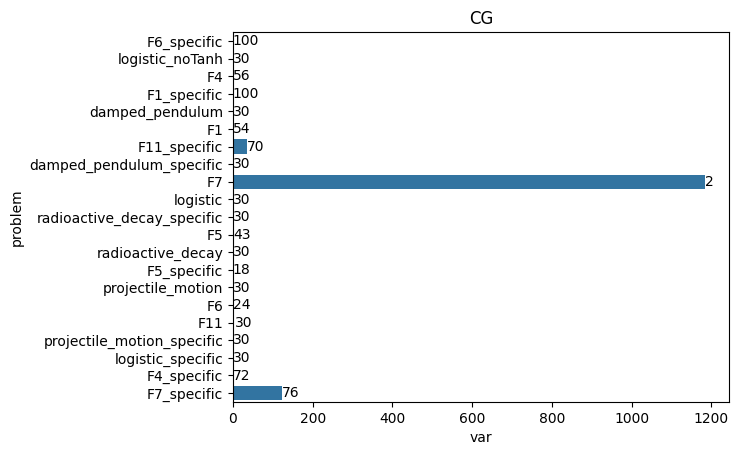

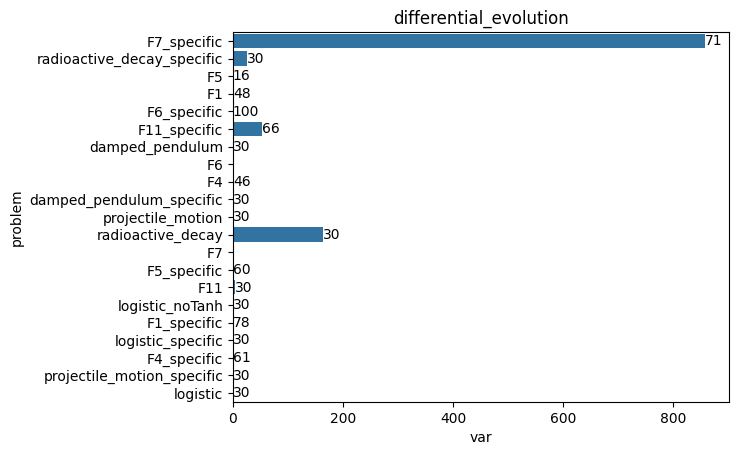

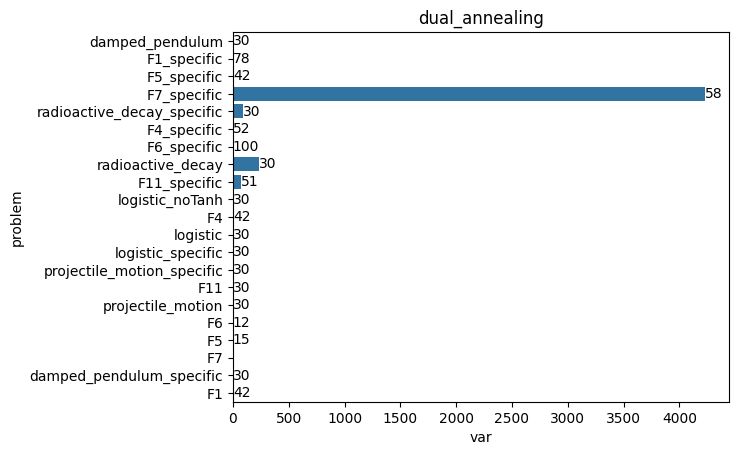

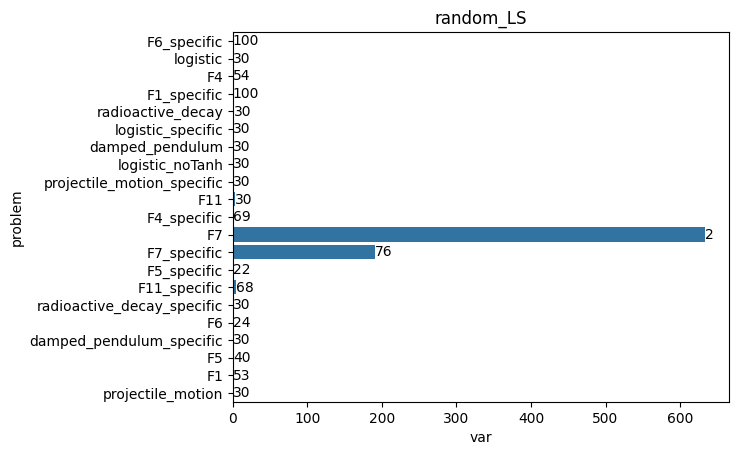

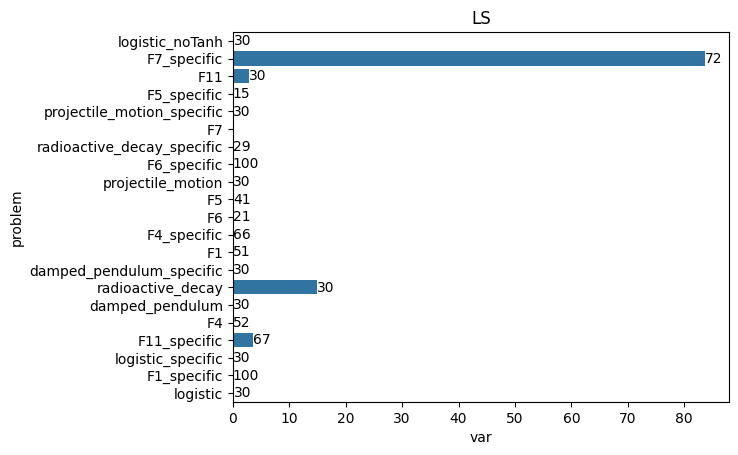

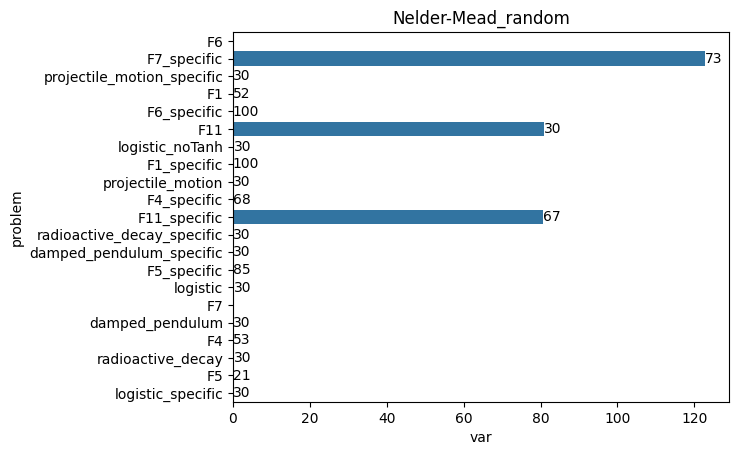

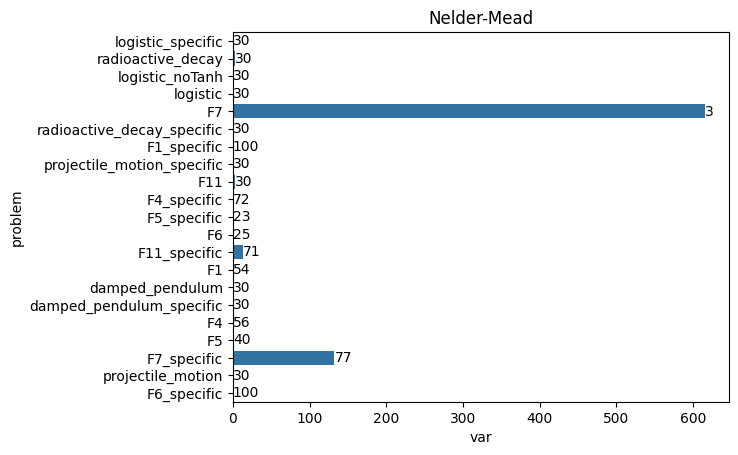

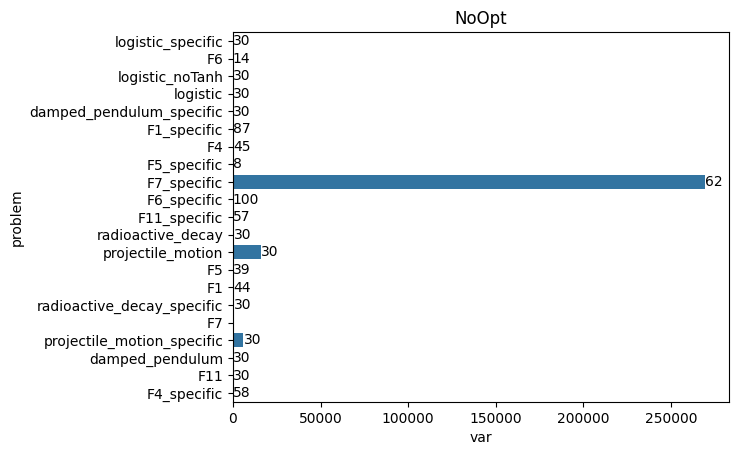

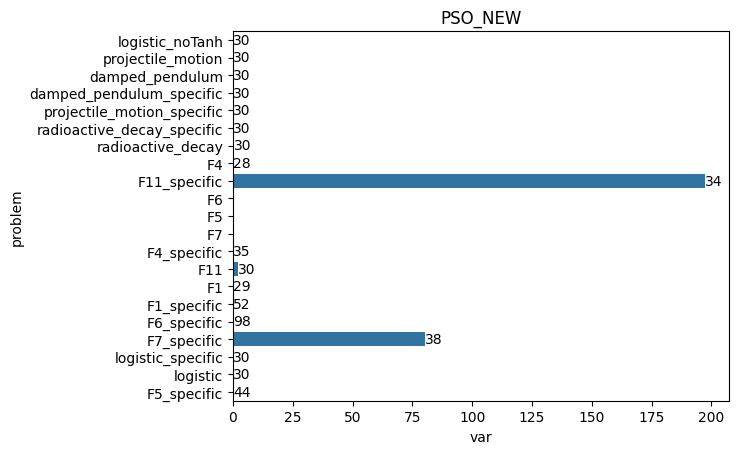

In [134]:
all_data = all_info(ted_data)

opts = ted_data["optimization"].unique()

for opt in opts:
    filt_data = all_data[all_data["optimization"] == opt]
    ax = sns.barplot(filt_data, x="var", y="problem")

    counts_data = ted_data[ted_data["optimization"] == opt]["problem"].value_counts()

    for p in ax.patches:
        y_value = ax.get_yticks()[int(p.get_y())]  # Get the y-tick location
        y_label = ax.get_yticklabels()[int(p.get_y()+0.5)].get_text()  # Get the actual label
        
        value = counts_data[y_label]

        width = p.get_width()  # Get the width (instead of height) of each bar
        ax.text(
            width,  # X position (at the end of the bar)
            p.get_y() + p.get_height() / 2.,  # Y position (centered vertically on the bar)
            f'{value:.0f}',  # Text label (formatted to 2 decimal points)
            ha="left",  # Horizontal alignment
            va="center"  # Vertical alignment
        )

    plt.title(opt)
    plt.show()



# Graphs

## MSE

In [171]:
problems = ted_data["problem"].unique()
len(problems), problems

(21,
 array(['F1_specific', 'F4_specific', 'F5_specific', 'F6_specific',
        'F7_specific', 'F11_specific', 'F4', 'F1', 'F5', 'F6', 'F7', 'F11',
        'logistic_specific', 'logistic', 'logistic_noTanh',
        'projectile_motion_specific', 'projectile_motion',
        'damped_pendulum_specific', 'damped_pendulum',
        'radioactive_decay_specific', 'radioactive_decay'], dtype=object))

In [172]:
# fig = plt.figure(figsize=(16, 8))
# gs = mpl.gridspec.GridSpec(2, 3, height_ratios=[1, 1.5])

# ax1 = fig.add_subplot(gs[0,0])
# ax2 = fig.add_subplot(gs[0,1], sharex=ax1)
# ax3 = fig.add_subplot(gs[0,2], sharex=ax2)
# ax4 = fig.add_subplot(gs[1, :])

# axs = [ax1, ax2, ax3, ax4]
# ted_datas = [ted_data1, ted_data2, ted_data3]

# for i in range(3):
#     sns.boxplot(ted_datas[i], x="MSE", y="optimization", hue="optimization", ax=axs[i])
#     if i>0:
#         axs[i].set_yticklabels("")
#         axs[i].set_ylabel("")

# sns.boxplot(ted_data, x="MSE", y="optimization", hue="optimization", ax=axs[3])

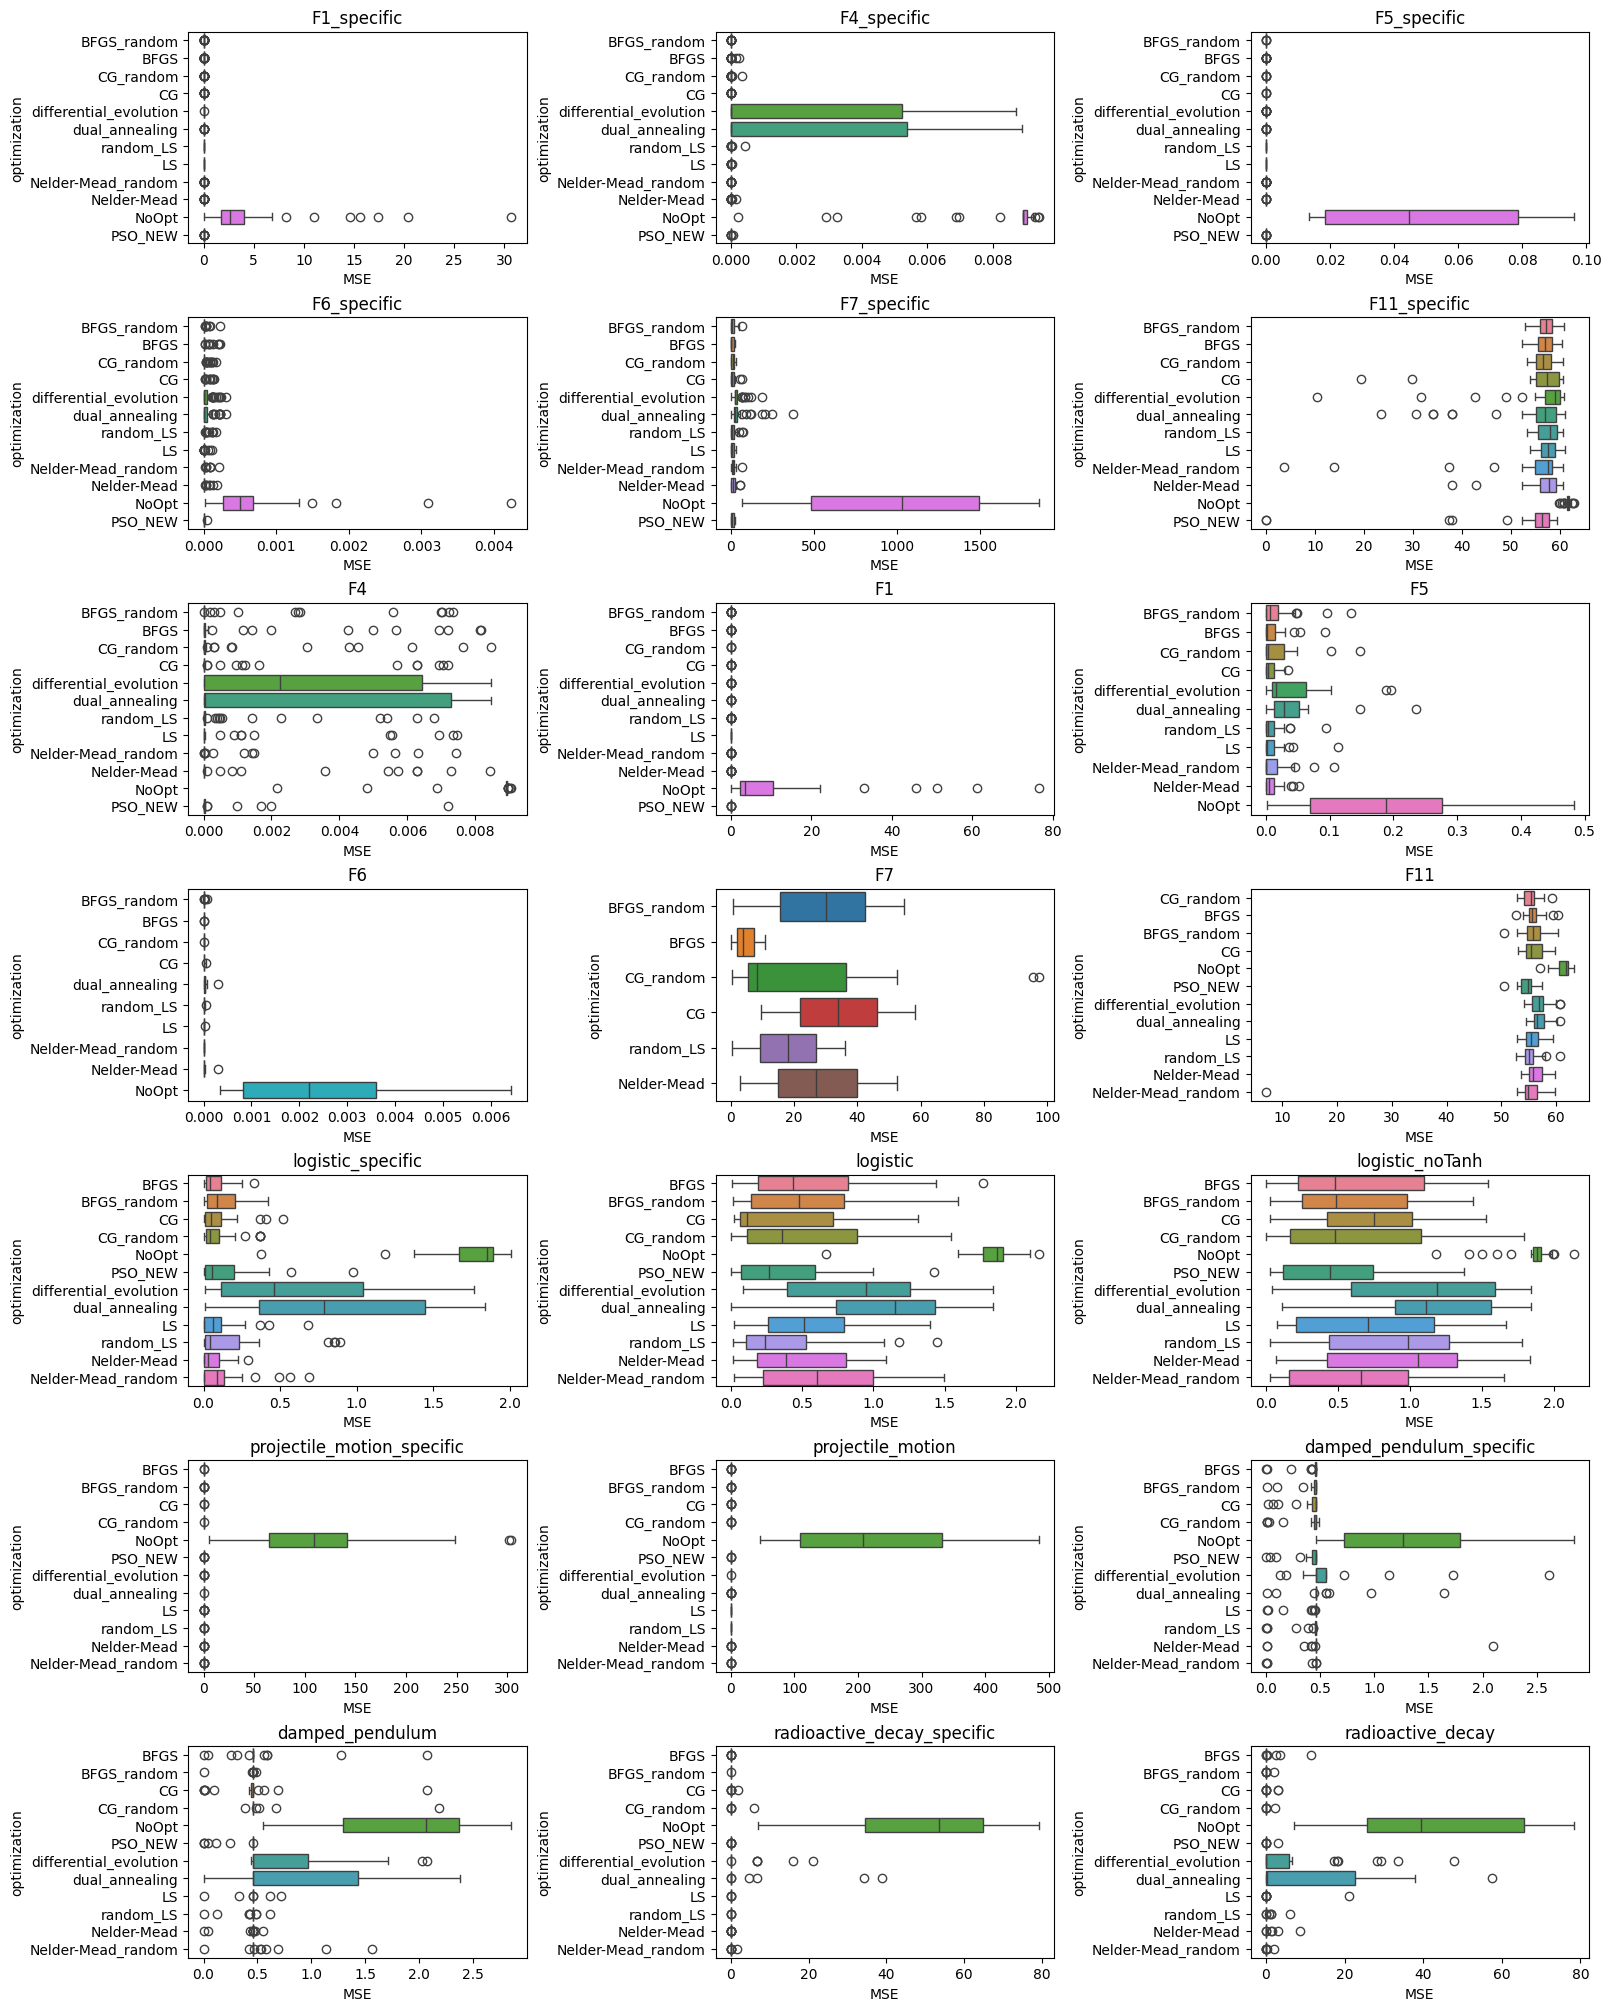

In [173]:
fig, axs = plt.subplots(7, 3, constrained_layout=True, figsize=(16, 20))

axs = axs.flatten()

for c, ax in enumerate(axs):
    data = ted_data[ted_data["problem"] == problems[c]]
    ax.set_title(problems[c])
    sns.boxplot(data, x="MSE", y="optimization", hue="optimization", ax=ax)

# Separating Specific and Standard

In [174]:
problems_std = []
problems_specific = []

for problem in problems:
    if "specific" in problem or "noTanh" in problem:
        problems_specific.append(problem)
    else:
        problems_std.append(problem)

problems_std, problems_specific

(['F4',
  'F1',
  'F5',
  'F6',
  'F7',
  'F11',
  'logistic',
  'projectile_motion',
  'damped_pendulum',
  'radioactive_decay'],
 ['F1_specific',
  'F4_specific',
  'F5_specific',
  'F6_specific',
  'F7_specific',
  'F11_specific',
  'logistic_specific',
  'logistic_noTanh',
  'projectile_motion_specific',
  'damped_pendulum_specific',
  'radioactive_decay_specific'])

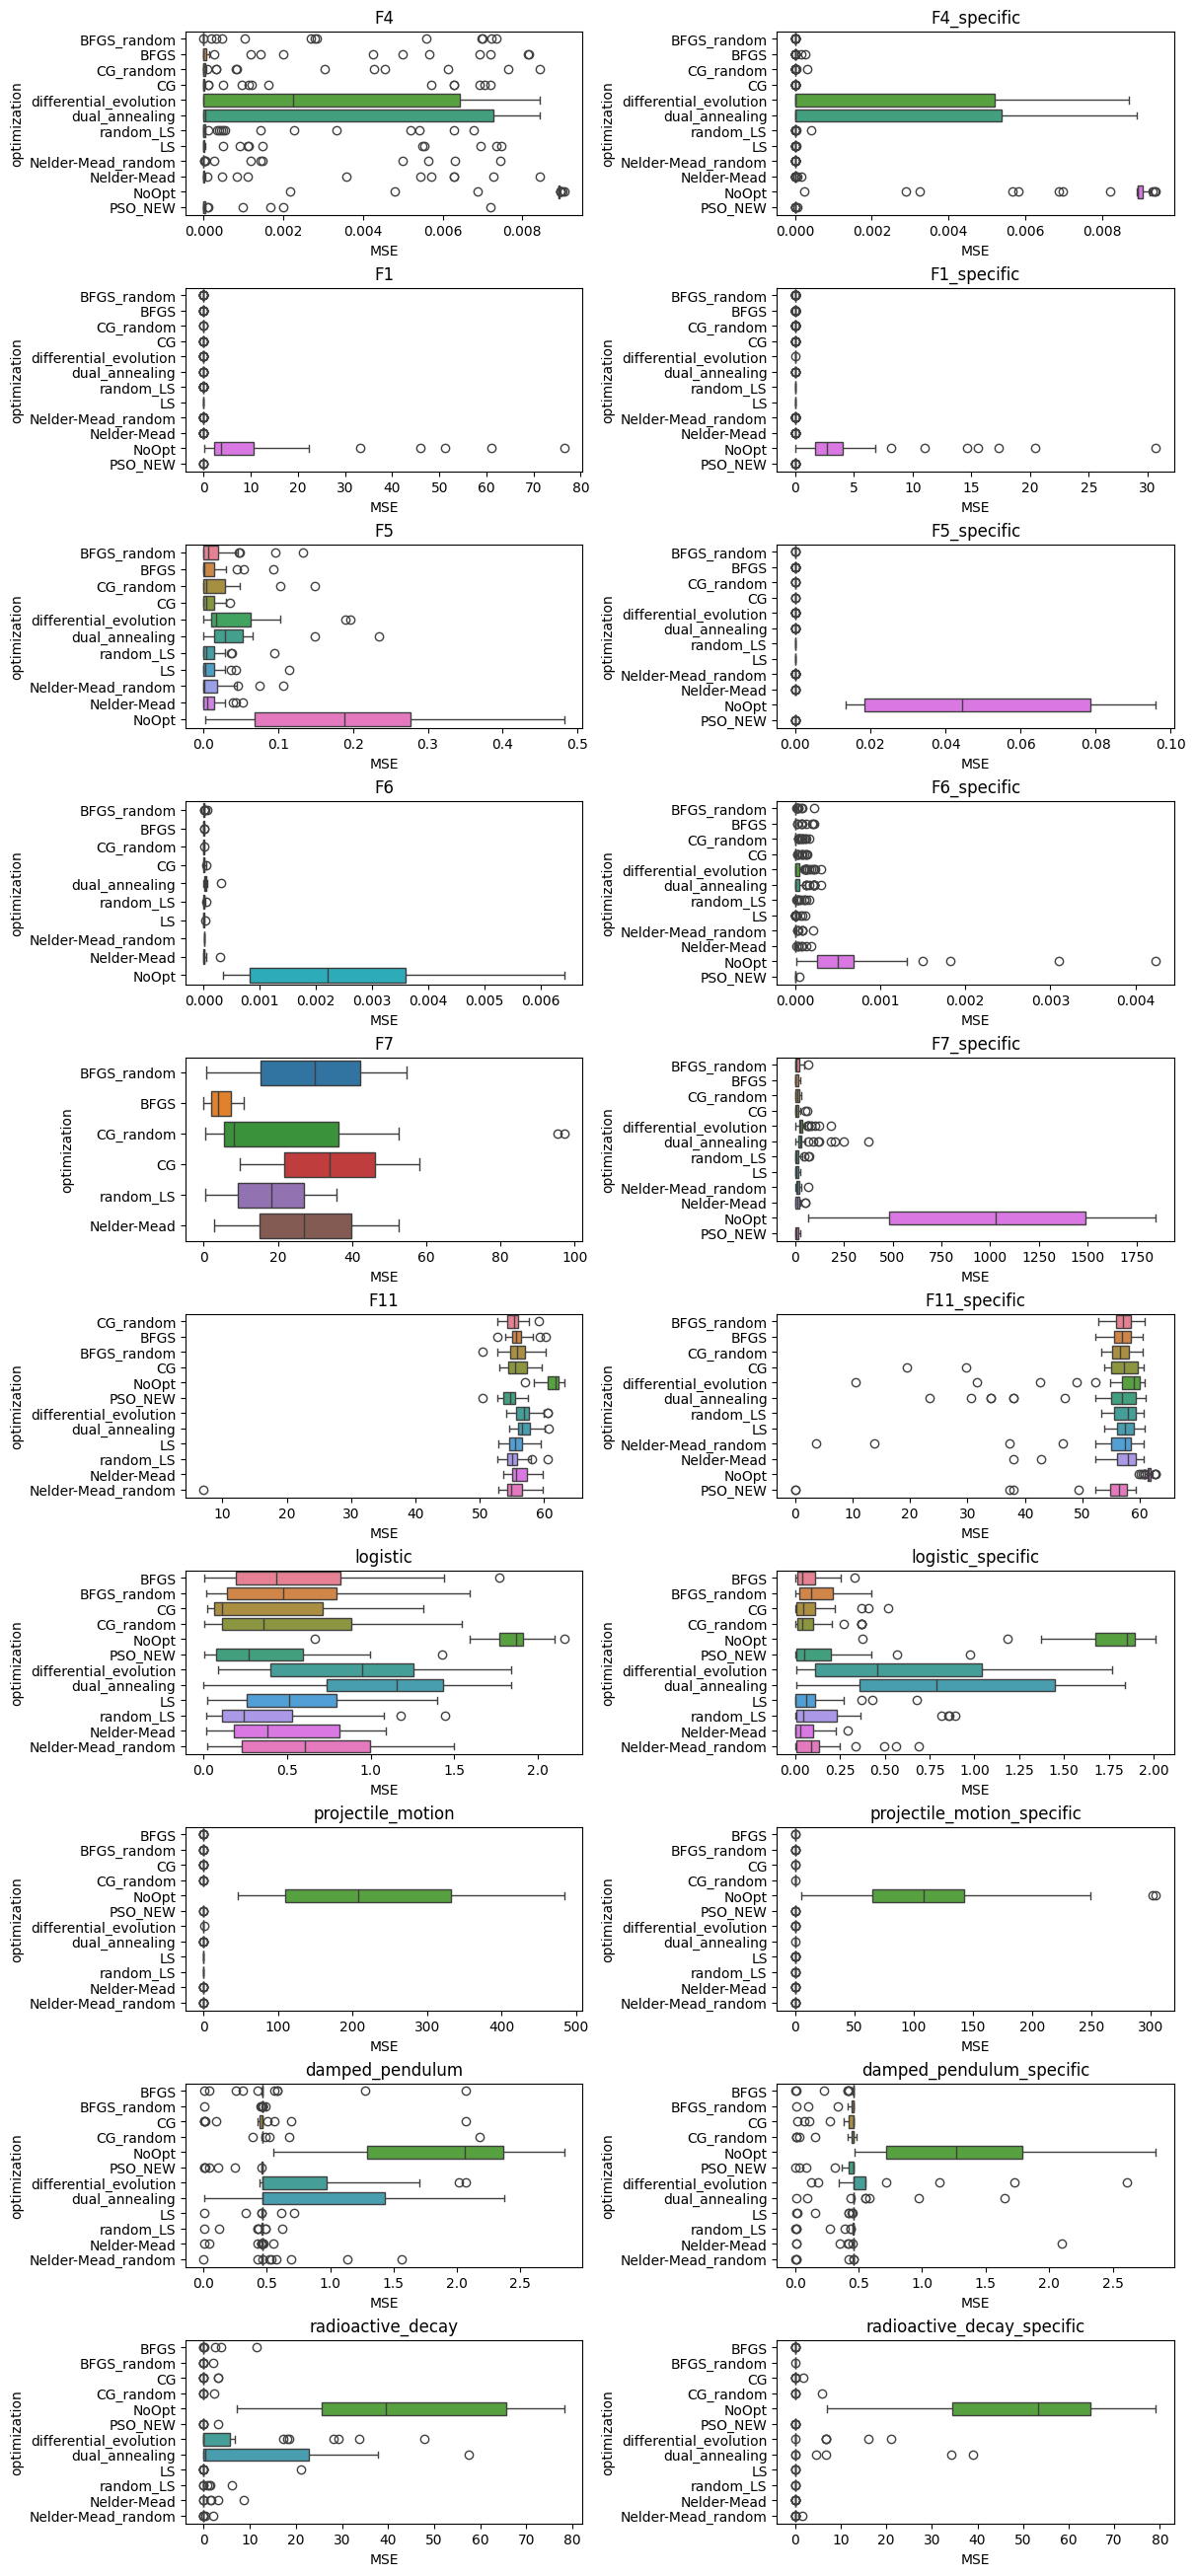

In [175]:
# Standard
fig, axs = plt.subplots(10, 2, constrained_layout=True, figsize=(12, 26))

axs = axs.flatten()

for c in range(int(len(axs)/2)):
    i = c*2
    data = ted_data[ted_data["problem"] == problems_std[c]]
    axs[i].set_title(problems_std[c])
    
    sns.boxplot(data, x="MSE", y="optimization", hue="optimization", ax=axs[i])
    
    for d, problem in enumerate(problems_specific):
        if f"{problems_std[c]}_" in problem:
            break
        
    data = ted_data[ted_data["problem"] == problem]
    axs[i+1].set_title(problems_specific[d])

    sns.boxplot(data, x="MSE", y="optimization", hue="optimization", ax=axs[i+1])
    

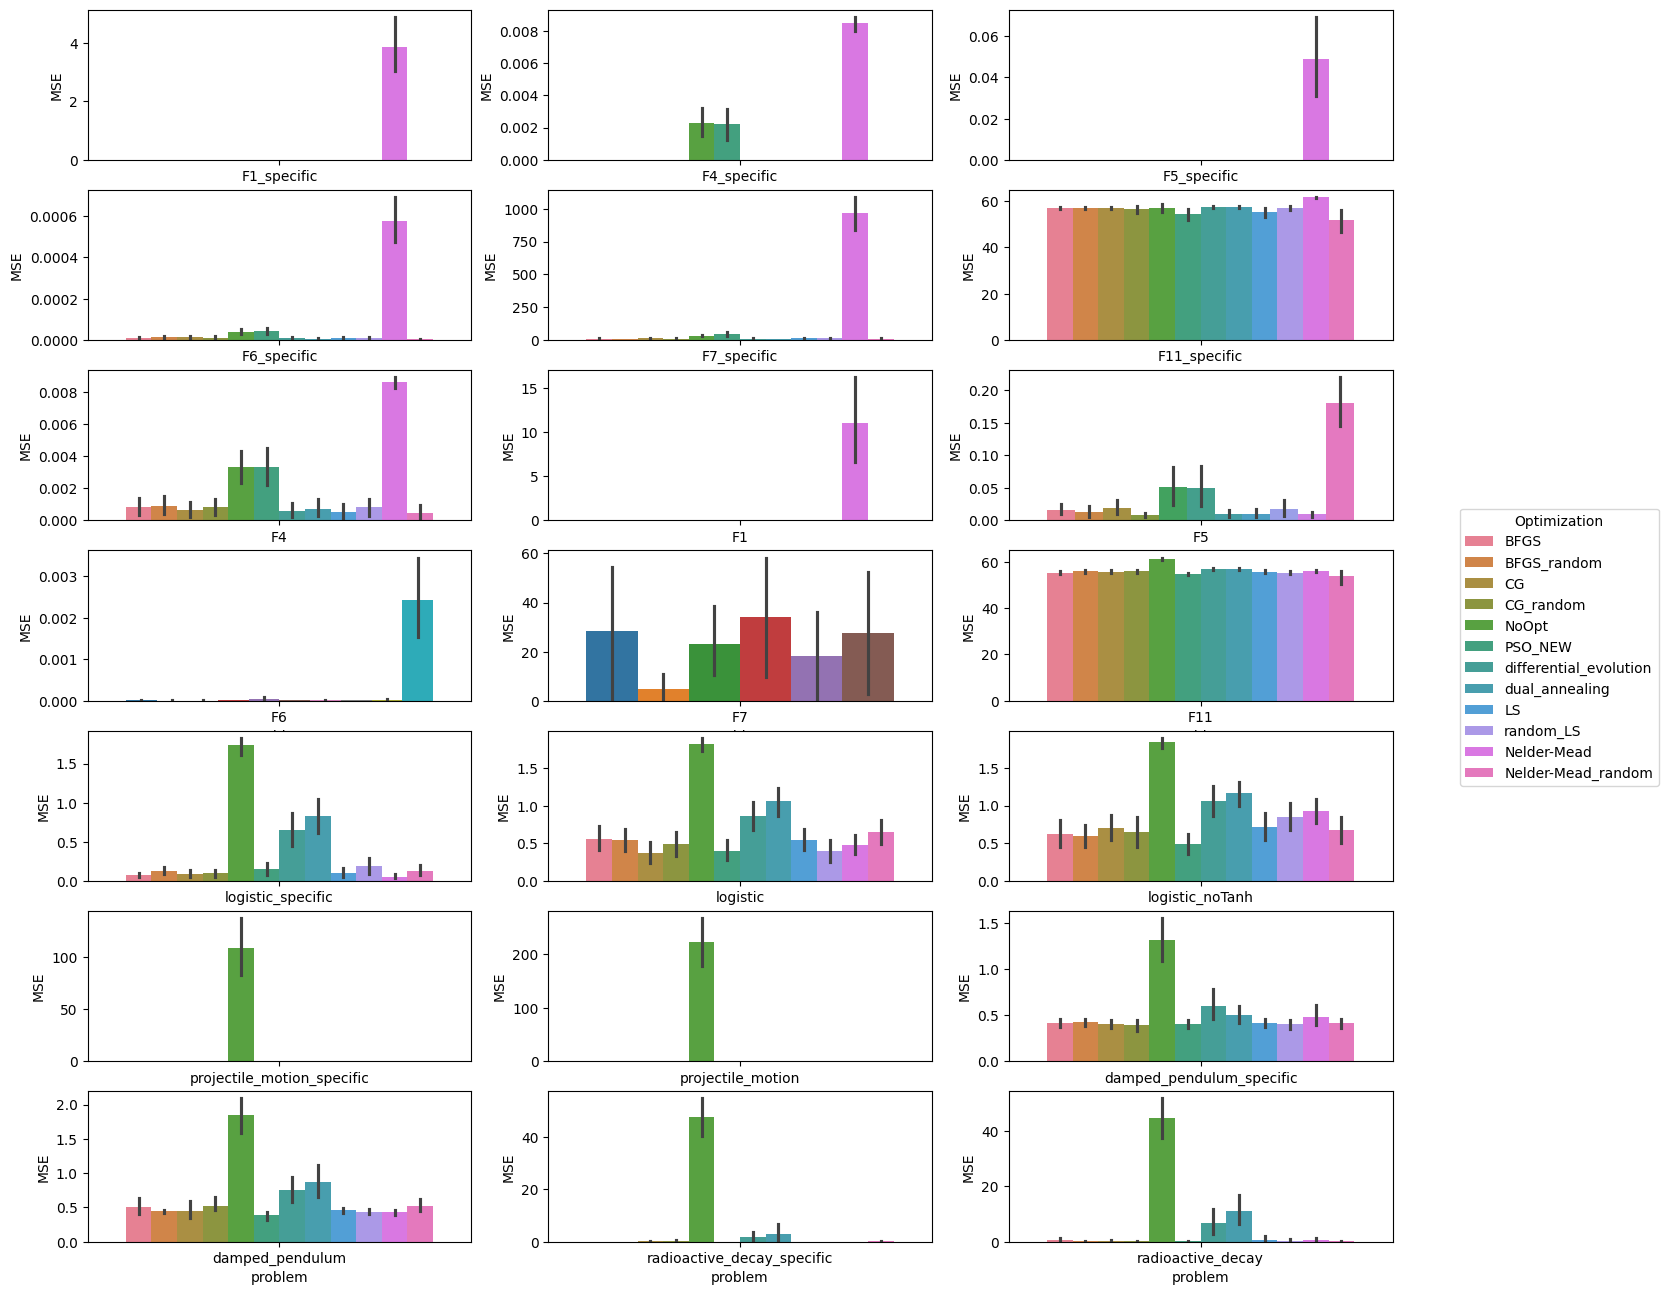

In [176]:
fig, axs = plt.subplots(7, 3, figsize=(18, 16))
axs = axs.flatten()

for ax, problem in zip(axs, problems):
    filt_data = ted_data[ted_data["problem"] == problem]
    sns.barplot(data=filt_data, x="problem", y="MSE", hue="optimization", ax=ax)
    ax.get_legend().remove()

# Get the handles and labels from the last plot for the legend
handles, labels = axs[-1].get_legend_handles_labels()

# Add the legend to the figure, positioned on the right
fig.legend(handles, labels, loc='center right', title='Optimization')

# Adjust layout to make space for the legend
plt.subplots_adjust(right=0.85)

plt.show()

## TED

In [177]:
# fig = plt.figure(figsize=(16, 8))
# gs = mpl.gridspec.GridSpec(2, 3, height_ratios=[1, 1.5])

# ax1 = fig.add_subplot(gs[0,0])
# ax2 = fig.add_subplot(gs[0,1], sharex=ax1)
# ax3 = fig.add_subplot(gs[0,2], sharex=ax2)
# ax4 = fig.add_subplot(gs[1, :])

# axs = [ax1, ax2, ax3, ax4]
# ted_datas = [ted_data1, ted_data2, ted_data3]

# for i in range(3):
#     sns.boxplot(ted_datas[i], x="TED", y="optimization", hue="optimization", ax=axs[i])
#     if i>0:
#         axs[i].set_yticklabels("")
#         axs[i].set_ylabel("")

# sns.boxplot(ted_data, x="TED", y="optimization", hue="optimization", ax=axs[3])

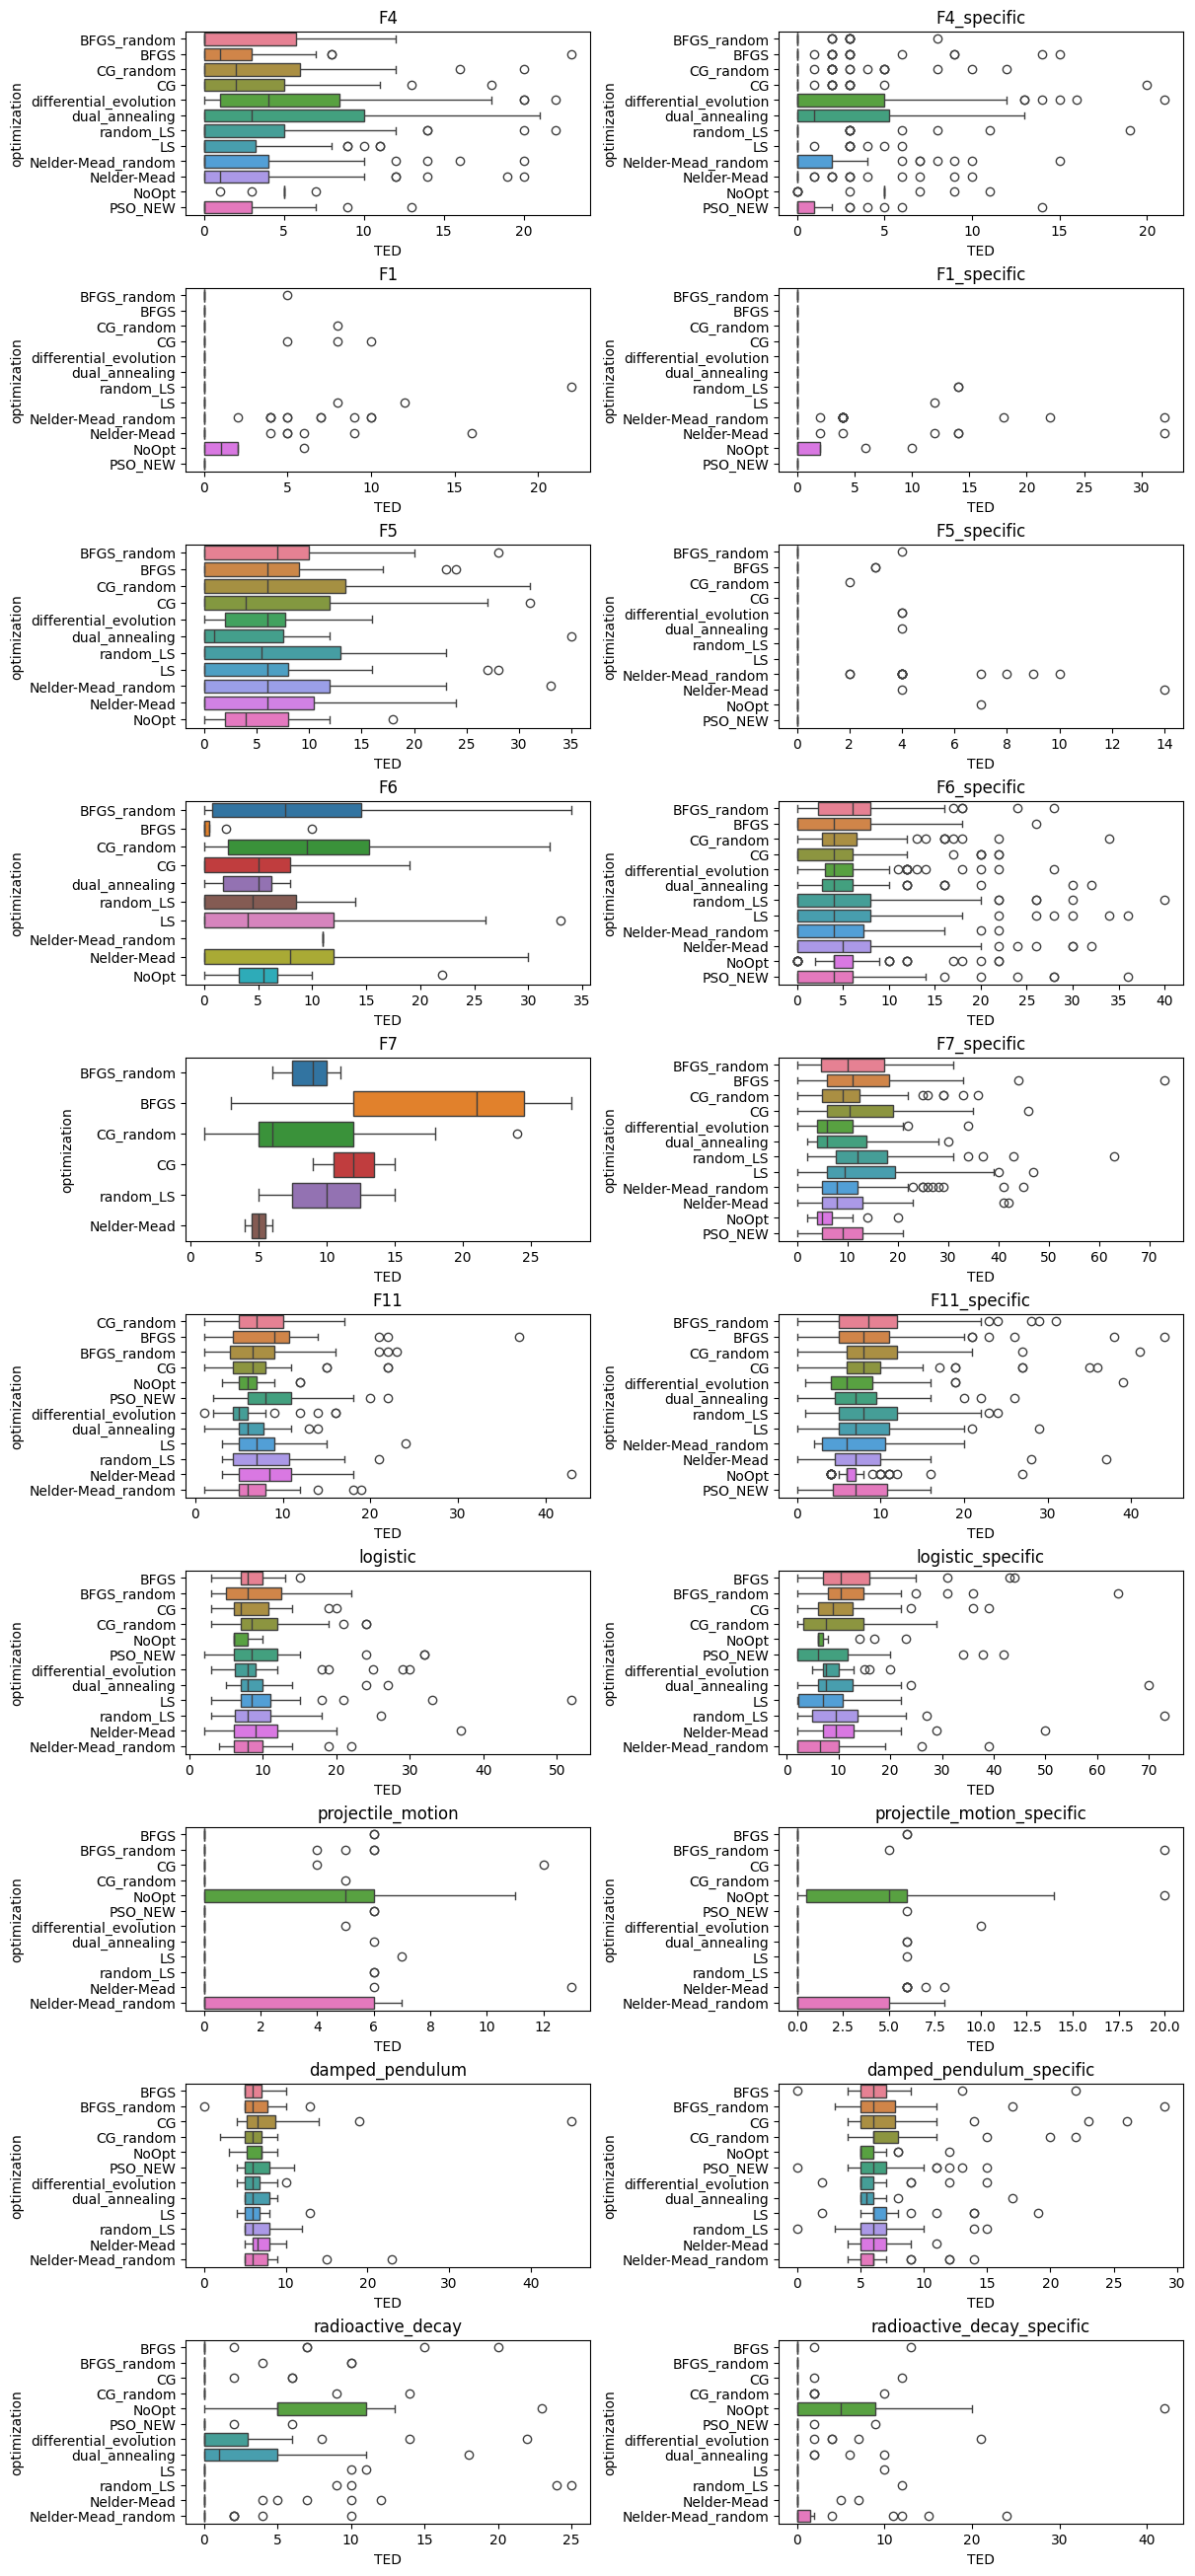

In [178]:
# Standard
fig, axs = plt.subplots(10, 2, constrained_layout=True, figsize=(12, 26))

axs = axs.flatten()

for c in range(int(len(axs)/2)):
    i = c*2
    data = ted_data[ted_data["problem"] == problems_std[c]]
    axs[i].set_title(problems_std[c])
    
    sns.boxplot(data, x="TED", y="optimization", hue="optimization", ax=axs[i])
    
    for d, problem in enumerate(problems_specific):
        if f"{problems_std[c]}_" in problem:
            break
        
    data = ted_data[ted_data["problem"] == problem]
    axs[i+1].set_title(problems_specific[d])

    sns.boxplot(data, x="TED", y="optimization", hue="optimization", ax=axs[i+1])
    

In [179]:
# fig = plt.figure(figsize=(16, 8))
# gs = mpl.gridspec.GridSpec(2, 3, height_ratios=[1, 1.5])

# ax1 = fig.add_subplot(gs[0,0])
# ax2 = fig.add_subplot(gs[0,1], sharex=ax1)
# ax3 = fig.add_subplot(gs[0,2], sharex=ax2)
# ax4 = fig.add_subplot(gs[1, :])

# axs = [ax1, ax2, ax3, ax4]
# ted_datas = [ted_data1, ted_data2, ted_data3]

# for i in range(3):
#     sns.violinplot(ted_datas[i], x="TED", y="optimization", hue="optimization", ax=axs[i])
#     if i>0:
#         axs[i].set_yticklabels("")
#         axs[i].set_ylabel("")

# sns.violinplot(ted_data, x="TED", y="optimization", hue="optimization", ax=axs[3])

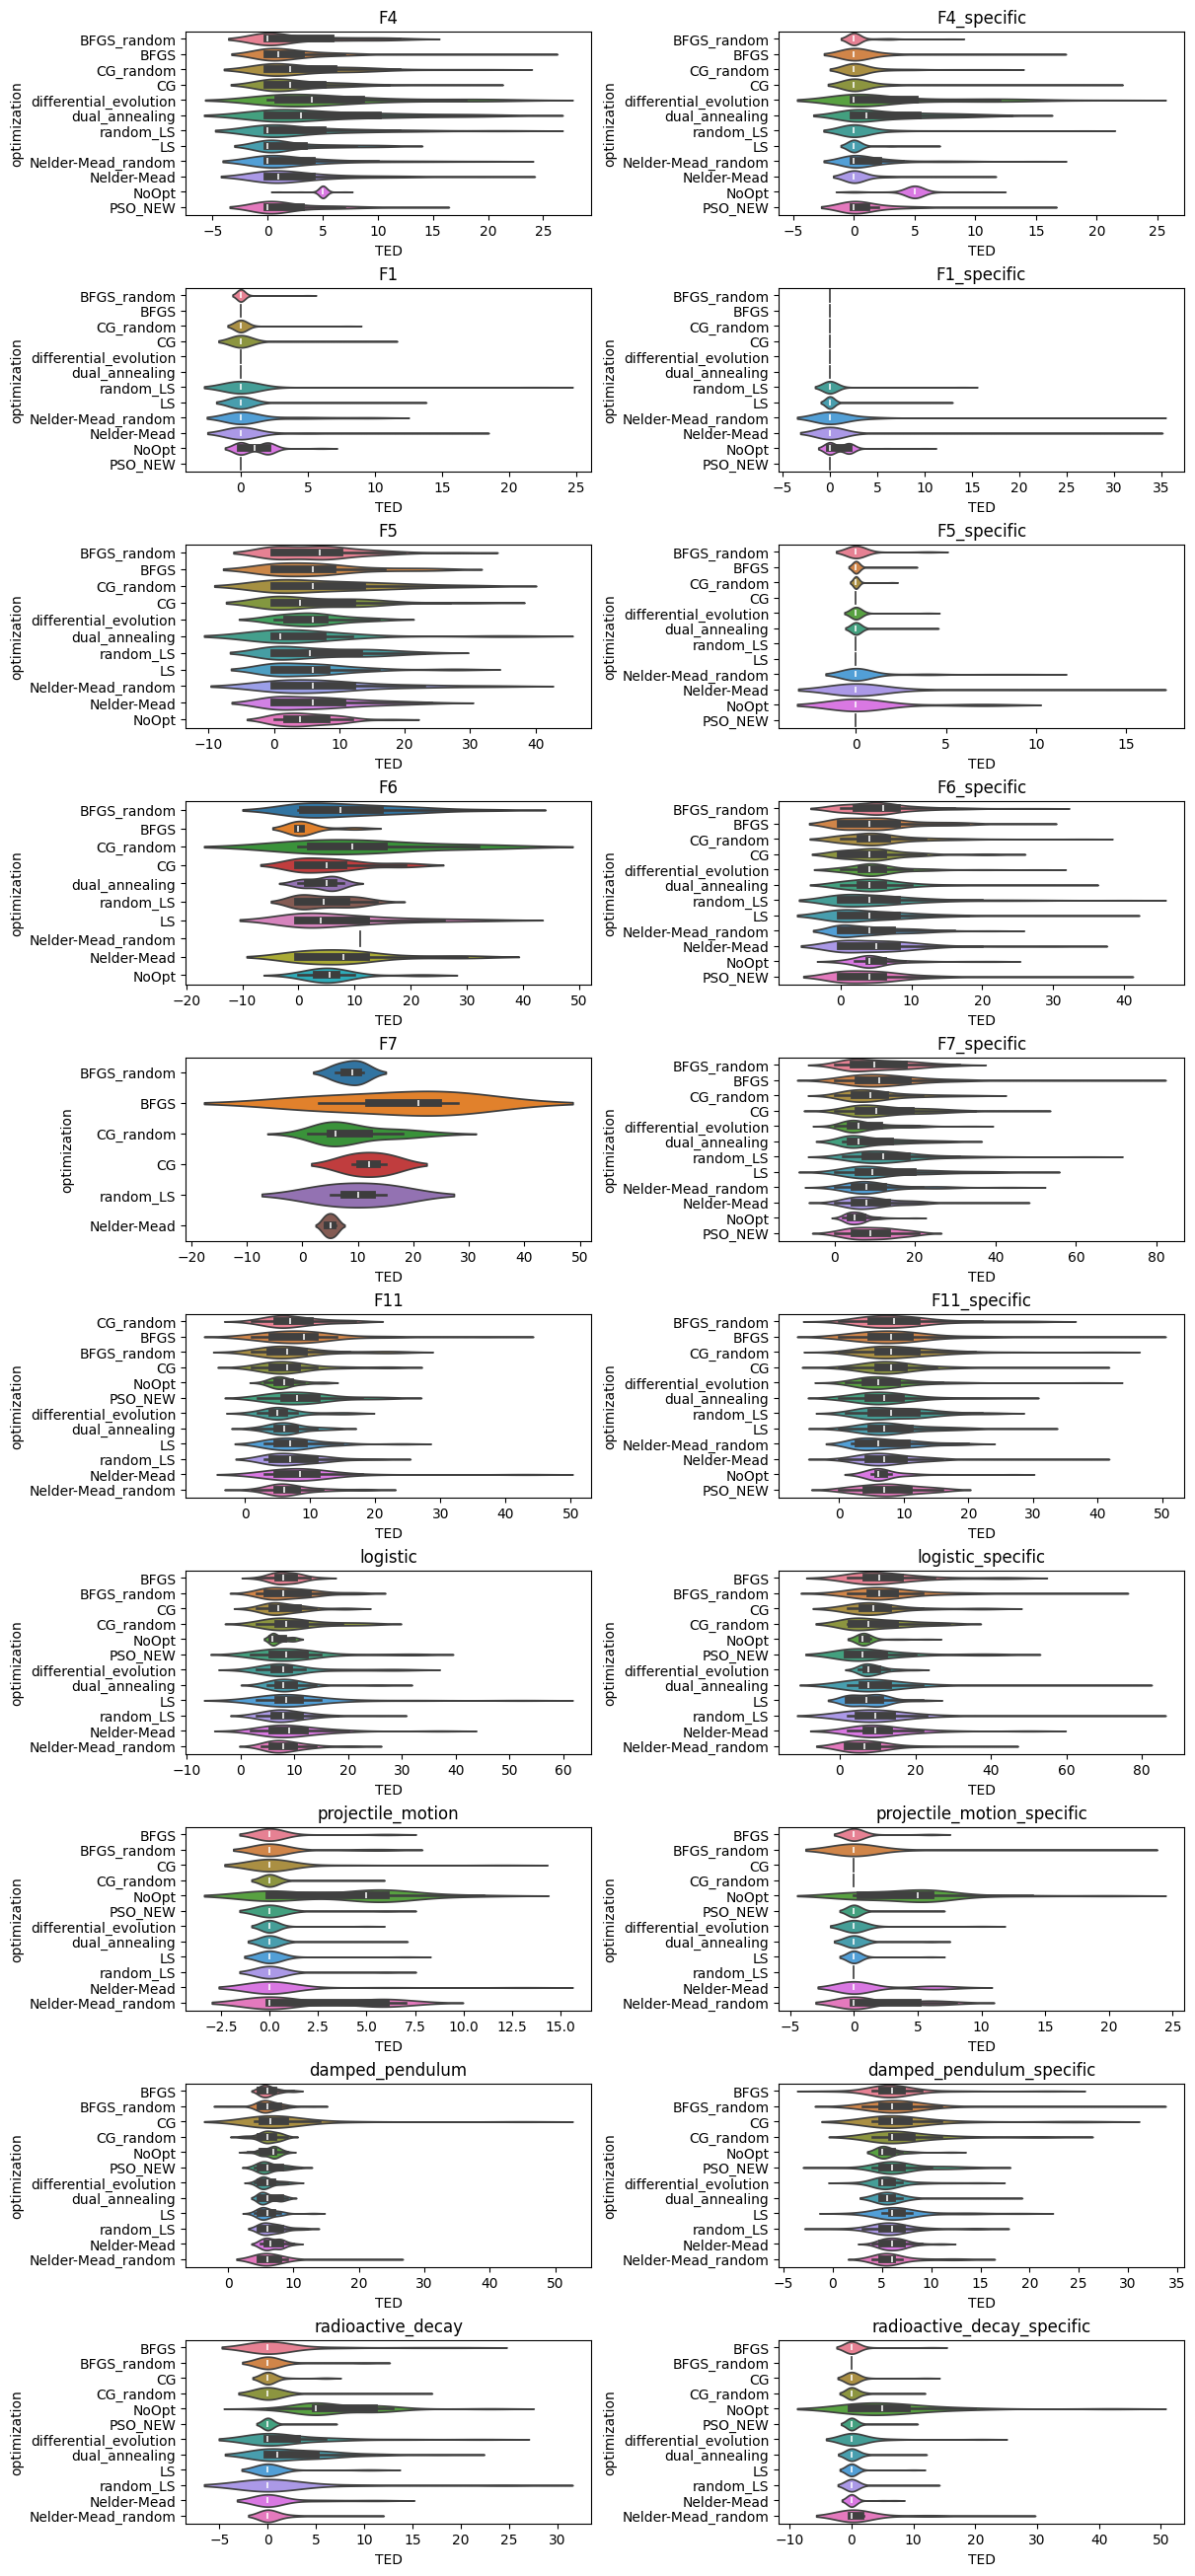

In [180]:
# Standard
fig, axs = plt.subplots(10, 2, constrained_layout=True, figsize=(12, 26))

axs = axs.flatten()

for c in range(int(len(axs)/2)):
    i = c*2
    data = ted_data[ted_data["problem"] == problems_std[c]]
    axs[i].set_title(problems_std[c])
    
    sns.violinplot(data, x="TED", y="optimization", hue="optimization", ax=axs[i])
    
    for d, problem in enumerate(problems_specific):
        if f"{problems_std[c]}_" in problem:
            break
        
    data = ted_data[ted_data["problem"] == problem]
    axs[i+1].set_title(problems_specific[d])

    sns.violinplot(data, x="TED", y="optimization", hue="optimization", ax=axs[i+1])
    

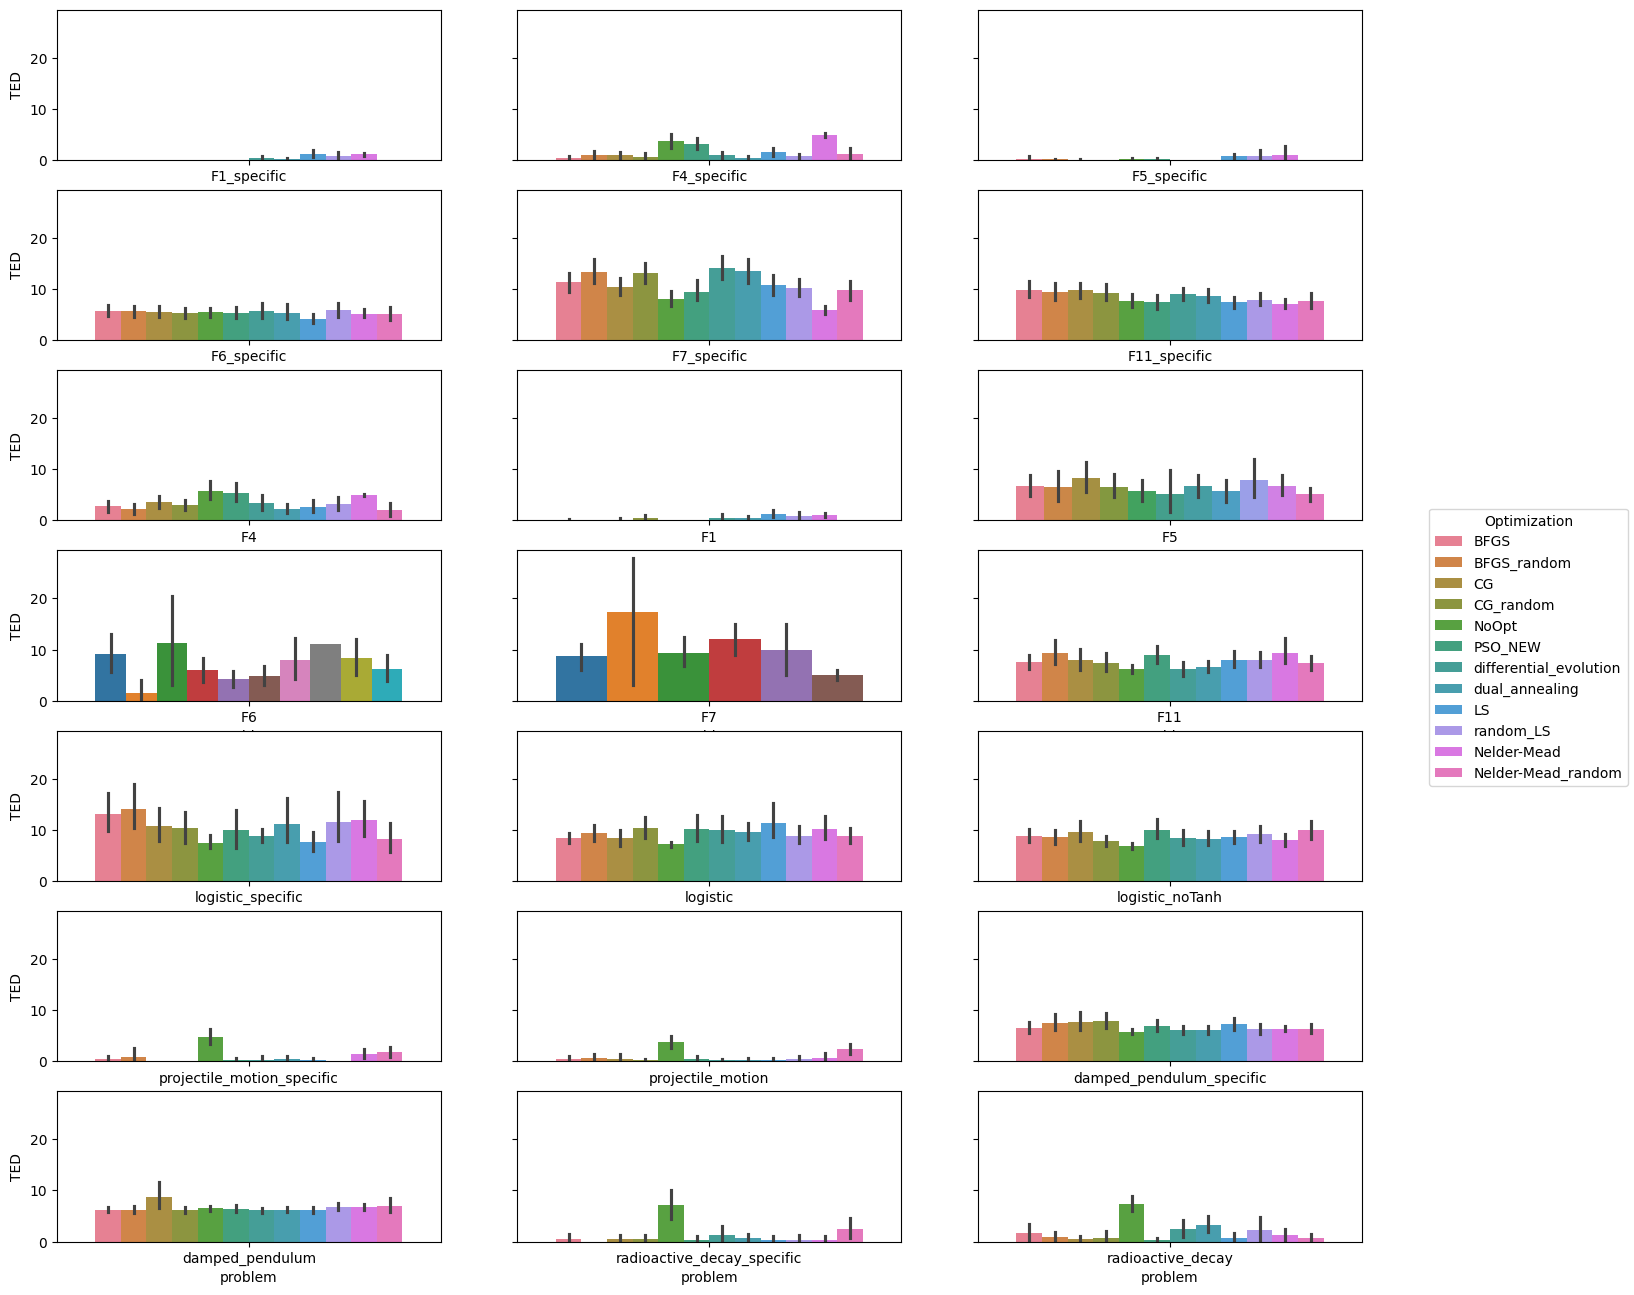

In [181]:
fig, axs = plt.subplots(7, 3, figsize=(18, 16), sharey=True)
axs = axs.flatten()

for ax, problem in zip(axs, problems):
    filt_data = ted_data[ted_data["problem"] == problem]
    sns.barplot(data=filt_data, x="problem", y="TED", hue="optimization", ax=ax)
    ax.get_legend().remove()

# Get the handles and labels from the last plot for the legend
handles, labels = axs[-1].get_legend_handles_labels()

# Add the legend to the figure, positioned on the right
fig.legend(handles, labels, loc='center right', title='Optimization')

# Adjust layout to make space for the legend
plt.subplots_adjust(right=0.85)

plt.show()



In [182]:
def TED_MSE_table(optimization, ted_threshold=3, MSE_threshold=1e-6):
    values = optimization[["TED", "MSE"]]

    table = np.zeros((2,2))
    correct = 0

    for index, row in values.iterrows():
        if row.TED <= ted_threshold and row.MSE <= MSE_threshold:
            table[0,0] += 1
        elif row.TED <= ted_threshold and row.MSE >= MSE_threshold:
            table[0,1] += 1
        elif row.TED >= ted_threshold and row.MSE <= MSE_threshold:
            table[1,0] += 1
        elif row.TED >= ted_threshold and row.MSE >= MSE_threshold:
            table[1,1] += 1

        if row.TED == 0:
            correct += 1

    table = pd.DataFrame(table, columns=["Positive", "Negative"], index=["Positive", "Negative"])

    total_TP = table.iloc[0,0] if table.iloc[0,0] > 0 else np.inf

    return table, correct / total_TP

In [183]:
def accuracy(optimization):
    values = optimization[["TED", "MSE"]]

    correct = 0

    for index, row in values.iterrows():
        if row.TED == 0:
            correct += 1

    total = len(values)

    return correct / total


def score(optimization, TED_threshold):
    table = TED_MSE_table(optimization, ted_threshold=TED_threshold)
    
    values = optimization[["TED", "MSE"]]

    correct = 0

    for index, row in values.iterrows():
        if row.TED == 0:
            correct += 1

    total_TP = table.iloc[0,0] if table.iloc[0,0] > 0 else 0.1
    return correct / total_TP


In [184]:
def info_table(data, TED_threshold=3):
    opts = data["optimization"].unique()

    info = {}

    for opt in opts:
        opt_data = data[data["optimization"] == opt]
        table, score = TED_MSE_table(opt_data, TED_threshold)
        acc = accuracy(opt_data)

        info[opt] = [table.iloc[0,0], score * table.iloc[0,0], score, acc]
    
    df = pd.DataFrame(info).T
    df.columns = ["Positive", "N-Perfect", "Perfect Score", "Accuracy"]
    return df


In [185]:
def plot_multiple_confusion_matrix(data, TED_treshold=[3], MSE_threshold=[1e-9]):
    fig, axs = plt.subplots(5, 3, figsize=(20, 14), constrained_layout=True)

    opts = ted_data["optimization"].unique()
    for ax, opt in zip(axs.flatten(), opts):

        sum_table, _ = TED_MSE_table(data[data["optimization"] == "LS"])
        for i,j in itertools.product([0,1], [0,1]):
            sum_table.iloc[i,j] = 0
            
        combinations = list(itertools.product(TED_treshold, MSE_threshold))

        for ted, mse in combinations:
            table, score = TED_MSE_table(data[data["optimization"] == opt], ted, mse)
            sum_table += table

        table = sum_table/len(combinations)

        sns.heatmap(table, annot=True, ax=ax, cmap="rocket")
        ax.set_title(opt)

    plt.suptitle(f"'Confusion Matrix' - TED ({TED_treshold}) X MSE ({MSE_threshold})", fontsize=20)
    plt.show()

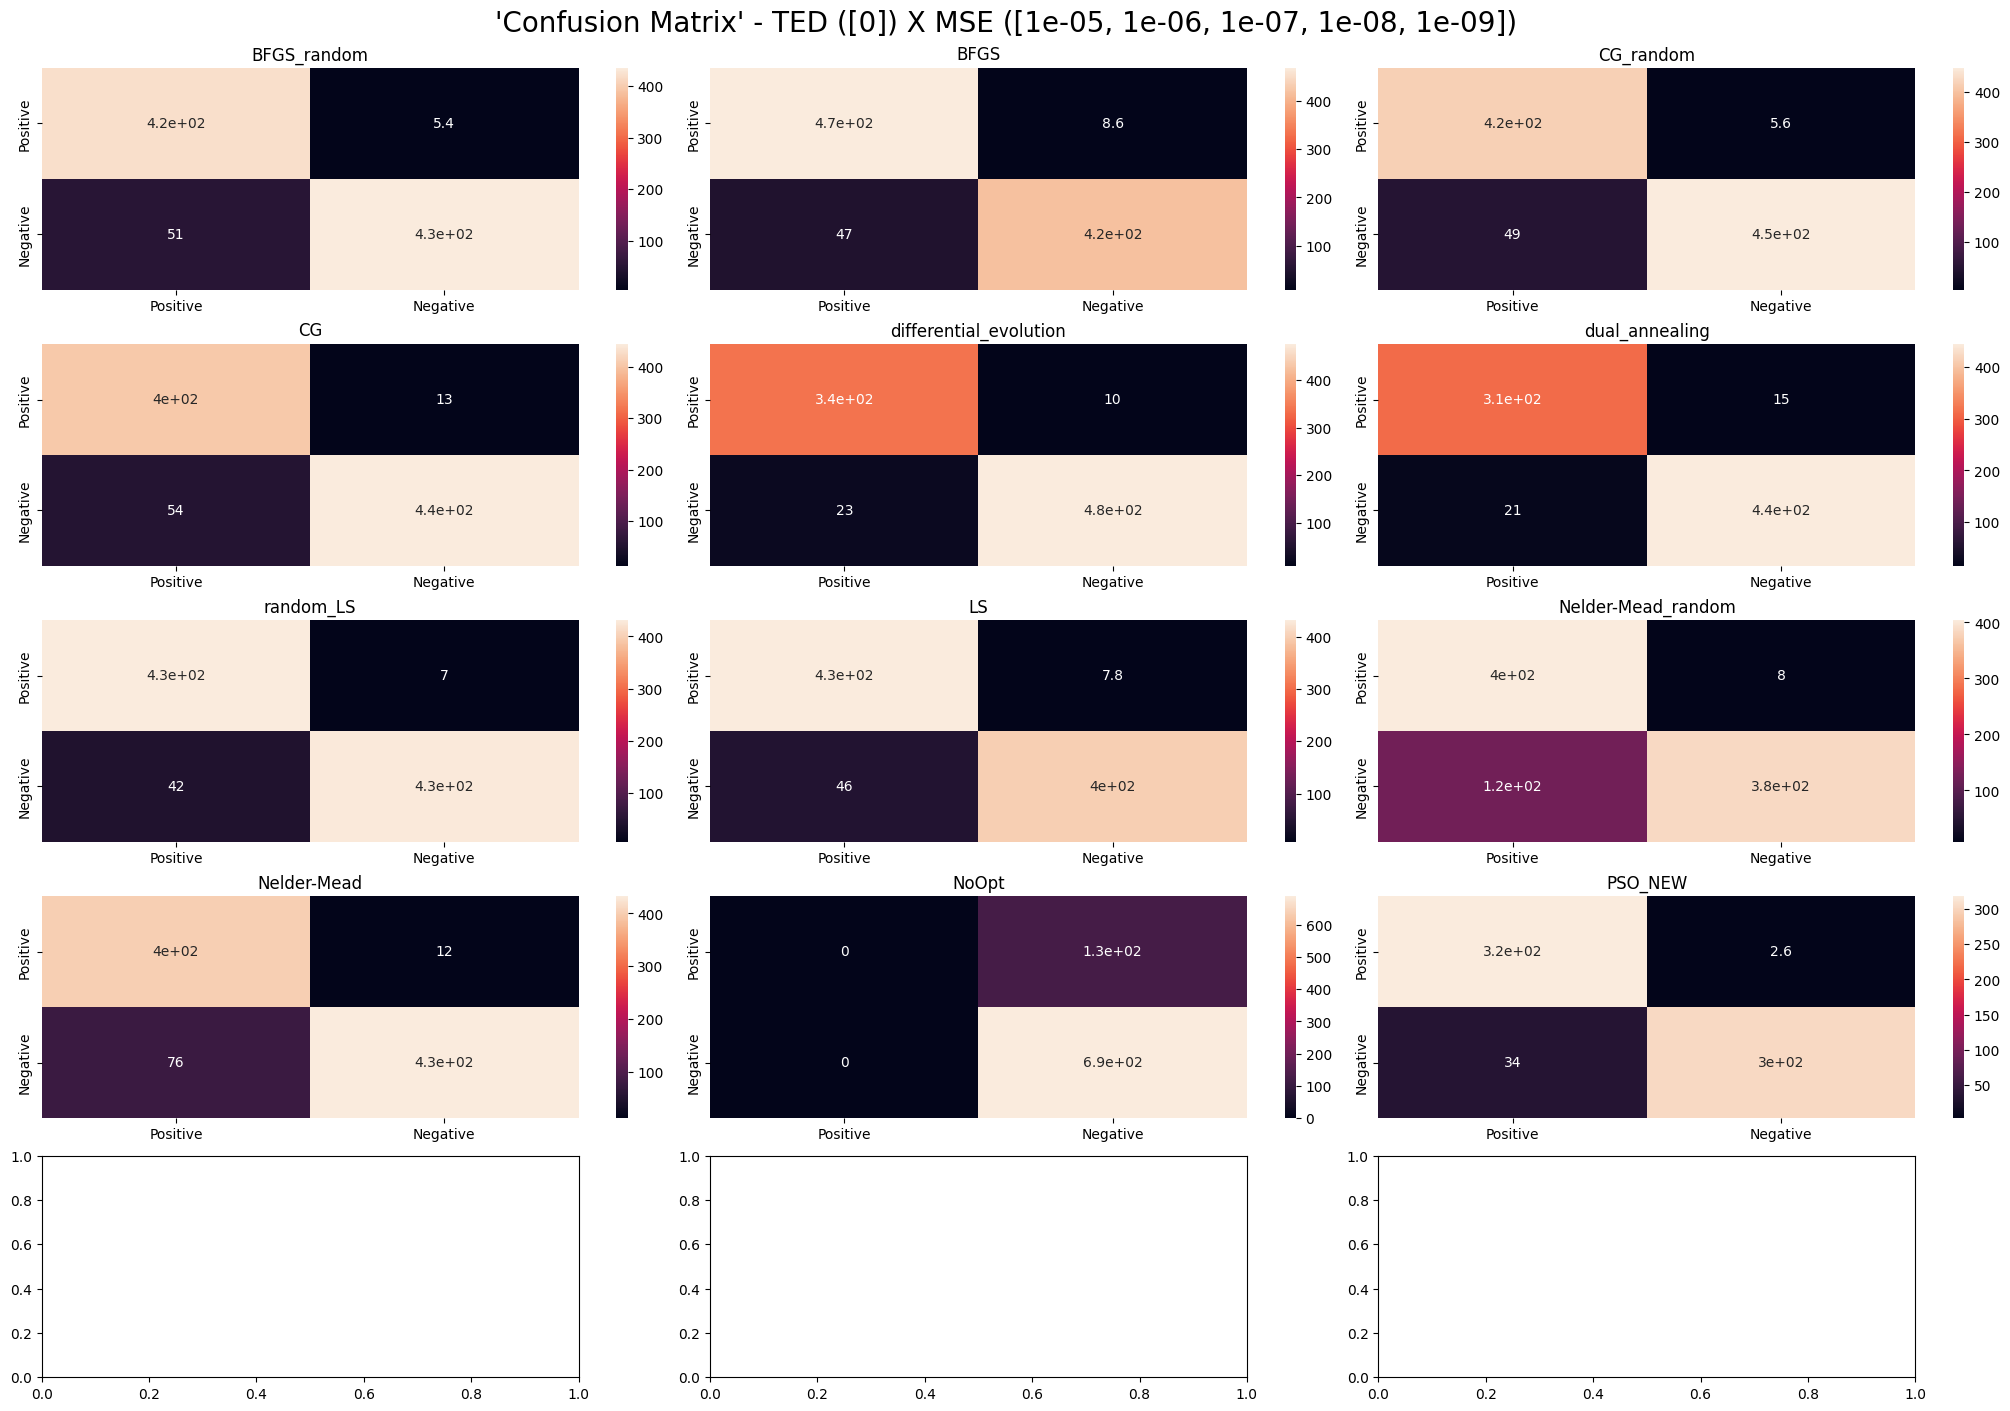

In [186]:
plot_multiple_confusion_matrix(ted_data, TED_treshold=[0], MSE_threshold=[1e-5, 1e-6, 1e-7, 1e-8, 1e-9])

# Scatter Plot

In [187]:
color_map = sns.color_palette("icefire", 7)

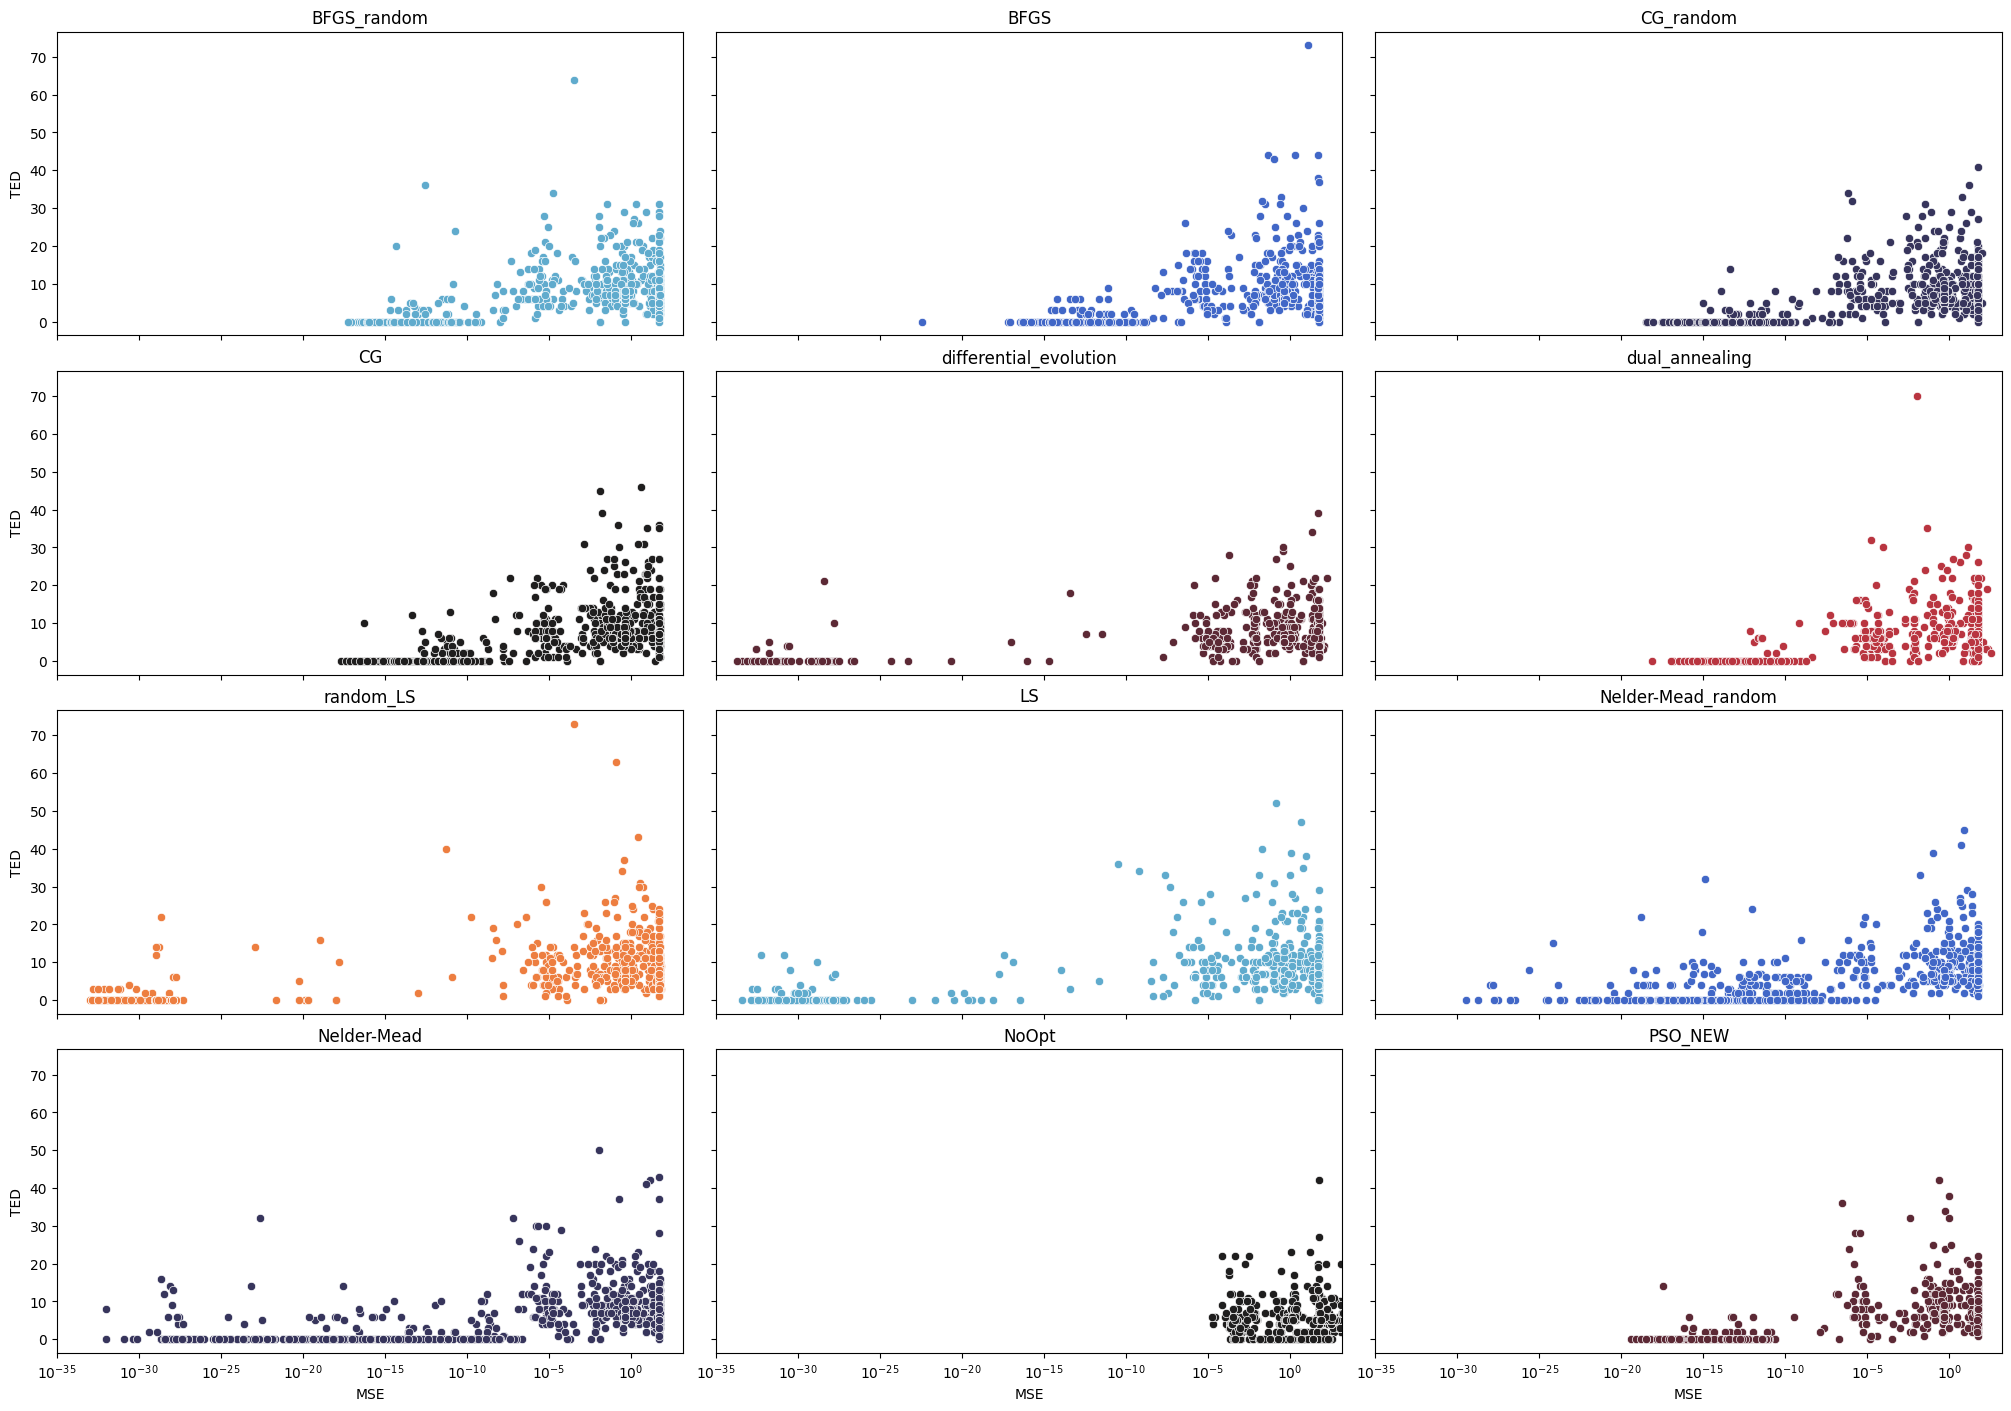

In [189]:
fig, axs = plt.subplots(4, 3, figsize=(20, 14), constrained_layout=True, sharey=True, sharex=True)


opts = list(ted_data["optimization"].unique())
scores = {}
n_true = {}

# opts.remove("PSO")

c=0 

for ax, opt in zip(axs.flatten(), opts):
    filt_data = ted_data[ted_data["optimization"] == opt]

    ax.set_xscale("log")
    sns.scatterplot(data=filt_data, x="MSE", y="TED", color=color_map[c], ax=ax)
    # ax.vlines(1e-4, 0, 35, color="black", linestyle="--")
    
    xmin, xmax = 1e-35, 1591.38

    ax.set_title(opt)
    
    ax.set_xlim(xmin, xmax)
    c = (c+1)%7


# plt.suptitle("'Confusion Matrix' - TED X MSE", fontsize=20)
plt.show()

# OBSERVAÇÃO

- Esse gráfico não faz muito sentido do jeito que está, porque ele dá mais vantagem para métodos **consistentes**. Ou seja, eu rodo 27 vezes, se nas 27 ele convergiu perfeito ele é muito consistente. Porém em um outro método ele não convergiu nada. Isso faz o score dele subir, porque ele acerta muito em um caso específico

- A consistência é interenssante de se analisar, o quão não dependente de aleatoriedade algo é, mas nesse caso em que queremos analisar um "generalização", de forma geral, o quão bom esse método é de resolver problemas em geral (acredito que essa seja a análise desse gráfico). Para esse caso, o resultado é manipulado para o lado de método mais consistentes. 

Para resolver isso precisamos de uma métrica que una o resultado em um único valor, para evitar esse peso e conta extra que é observado e tornar o ambiente mais "justo".

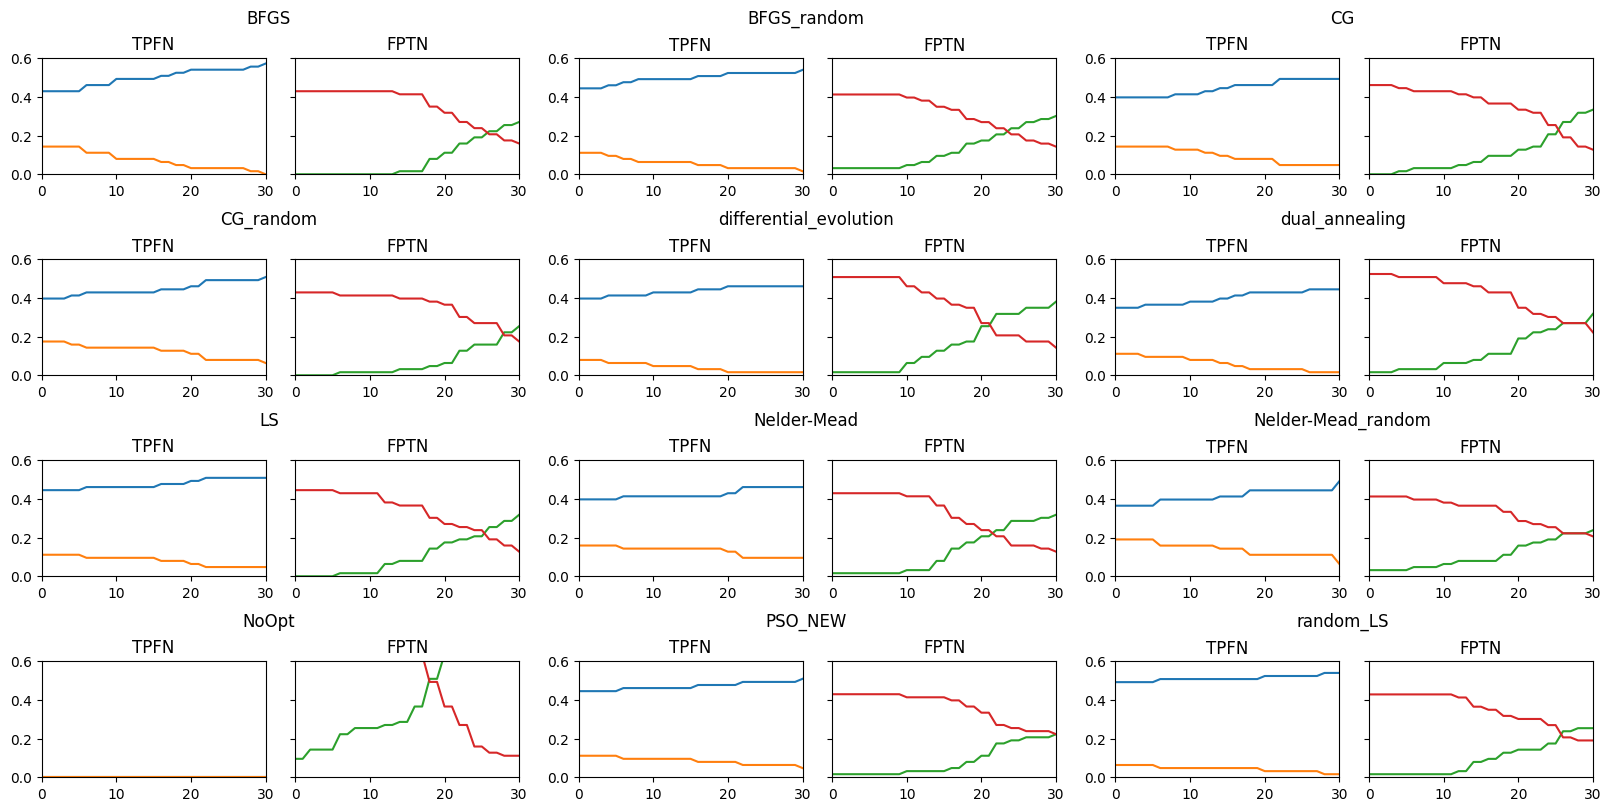

In [79]:
# fig, axs = plt.subplots(3, 3, figsize=(20, 14), constrained_layout=True, sharex=True, sharey=True)
fig = plt.figure(constrained_layout=True, figsize=(16, 8))
subfigs = fig.subfigures(4,3)

MSE_threshold = [1e-4]
TED_treshold = list(range(0, 31))

opts = list(ted_data["optimization"].unique())
# opts.remove("NoOpt")
opts.remove("PSO")
# for ax, opt in zip(axs.flatten(), opts):

total = len(ted_data[ted_data["optimization"] == "LS"])

for outerind, subfig in enumerate(subfigs.flat):

    sum_table, _ = TED_MSE_table(ted_data[ted_data["optimization"] == "LS"])
    for i,j in itertools.product([0,1], [0,1]):
        sum_table.iloc[i,j] = 0
        
    combinations = list(itertools.product(TED_treshold, MSE_threshold))

    TP = []
    FP = []
    FN = []
    TN = []

    for ted, mse in combinations:
        table, score = TED_MSE_table(ted_data[ted_data["optimization"] == opts[(outerind)%12]], ted, mse)
        TP.append(table.iloc[0,0])
        FP.append(table.iloc[0,1])
        FN.append(table.iloc[1,0])
        TN.append(table.iloc[1,1])

    axs = subfig.subplots(1, 2, sharex=True, sharey=True)
    subfig.suptitle(opts[(outerind)%12])
    # sns.heatmap(table, annot=True, ax=ax, cmap="rocket")
    sns.lineplot(x=TED_treshold, y=np.array(TP)/total, ax=axs[0], c="tab:blue")
    sns.lineplot(x=TED_treshold, y=np.array(FN)/total, ax=axs[0], c="tab:orange") 
    sns.lineplot(x=TED_treshold, y=np.array(FP)/total, ax=axs[1], c="tab:green") 
    sns.lineplot(x=TED_treshold, y=np.array(TN)/total, ax=axs[1], c="tab:red") 
    # ax.set_title(opt)

    # for ax in axs.flat:
    #     ax.set_xticks([])
    #     ax.set_yticks([])

    titles = ["TP" + "FN", "FP" + "TN"]
    for c, ax in enumerate(axs.flatten()):
        ax.set_xlim(0, 30)
        ax.set_ylim(0, 0.6)
        ax.set_title(titles[c])

# plt.suptitle(f"'Confusion Matrix' - TED ({TED_treshold}) X MSE ({MSE_threshold})", fontsize=20)
plt.show()

# Success Rate

In [226]:
def calculate_sucess_rates(data):
    problems = data["problem"].unique()
    opts = data["optimization"].unique()

    dfs = []

    for opt in opts:
        
        opt_data = data[data["optimization"] == opt]

        info_dict = {}
        problem_dfs = []

        for problem in problems:
            problem_data = opt_data[opt_data["problem"] == problem]

            try: 
                success_rate = problem_data["TED"].value_counts()[0]/len(problem_data)
            except:
                success_rate = np.inf
            
            info_dict["problem"] = problem
            info_dict["success_rate"] = success_rate

            problem_dfs.append(pd.DataFrame([info_dict]))
        
        opt_dfs = pd.concat(problem_dfs)
        opt_dfs["optimization"] = opt
        dfs.append(opt_dfs)

    return pd.concat(dfs).sort_values("optimization").reset_index(drop=True)


calculate_sucess_rates(ted_data).head(60)


problem  success_rate optimization
0                           F6      0.750000         BFGS
1                  F5_specific      0.974026         BFGS
2                  F6_specific      0.320000         BFGS
3                  F7_specific      0.026316         BFGS
4                 F11_specific      0.041667         BFGS
5                           F4      0.482143         BFGS
6                           F1      1.000000         BFGS
7                           F5      0.391304         BFGS
8                           F7           inf         BFGS
9                  F4_specific      0.805556         BFGS
10                         F11           inf         BFGS
11                    logistic           inf         BFGS
12             logistic_noTanh           inf         BFGS
13  projectile_motion_specific      0.933333         BFGS
14           projectile_motion      0.933333         BFGS
15    damped_pendulum_specific      0.033333         BFGS
16             damped_pendulum           inf         BFGS
17  radioactive_decay_specific      0.933333         BFGS
18           radioactive_decay      0.833333         BFGS
19           logistic_specific           inf         BFGS
20                 F1_specific      1.000000         BFGS
21                 F1_specific      1.000000  BFGS_random
22  radioactive_decay_specific      1.000000  BFGS_random
23           radioactive_decay      0.900000  BFGS_random
24                 F5_specific      0.941176  BFGS_random
25                 F6_specific      0.250000  BFGS_random
26                 F7_specific      0.052632  BFGS_random
27                F11_specific      0.014286  BFGS_random
28                          F4      0.592593  BFGS_random
29                          F1      0.981481  BFGS_random
30                          F5      0.348837  BFGS_random
31                          F6      0.250000  BFGS_random
32                 F4_specific      0.873239  BFGS_random
33                         F11           inf  BFGS_random
34                          F7           inf  BFGS_random
35    damped_pendulum_specific           inf  BFGS_random
36           projectile_motion      0.866667  BFGS_random
37  projectile_motion_specific      0.933333  BFGS_random
38             damped_pendulum      0.033333  BFGS_random
39                    logistic           inf  BFGS_random
40           logistic_specific           inf  BFGS_random
41             logistic_noTanh           inf  BFGS_random
42                          F7           inf           CG
43                 F6_specific      0.260000           CG
44                 F7_specific      0.013158           CG
45                F11_specific      0.014286           CG
46                          F4      0.339286           CG
47                          F1      0.944444           CG
48                 F5_specific      1.000000           CG
49                          F5      0.441860           CG
50                         F11           inf           CG
51  projectile_motion_specific      1.000000           CG
52                    logistic           inf           CG
53             logistic_noTanh           inf           CG
54           projectile_motion      0.933333           CG
55    damped_pendulum_specific           inf           CG
56             damped_pendulum           inf           CG
57  radioactive_decay_specific      0.933333           CG
58           radioactive_decay      0.900000           CG
59                 F4_specific      0.847222           CG